### Read the following instructions carefully.

1) Label your homework solutions with your last name, such as Exam1_Basnet.

2) Deliverables: You need to submit 2 solution files + the image file you used.
* ipython notebook file with all of your codes
* HTML file of your ipython notebook file.
*  <font color='red'> PDF file of the solution is not required. </font> 

3) To submit your exam solutions, go to our course in Canvas --> Assignments --> Exam 1 --> Submit Assignment --> Click "Choose File" --> choose the HTML file you saved --> Click another file--> choose ipynb file. Once you submit, download and check to ensure that you have submitted the correct files.


4) You can use this ipynb file to start your solution. 


5) This Exam is graded only by your Instructors/TAs.

<font color='red'> WARNING: Disclosure of this assignment and assignment answers to anybody or any website is a contributory infringement of academic dishonesty at ISU. Do not share or post course materials without the express written consent of the copyright holder and instructor. The class will follow Iowa State University’s policy on academic dishonesty. Anyone suspected of academic dishonesty will be reported to the Dean of Students Office.</font>


### Data Source
https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set?resource=download&select=beer_profile_and_ratings.csv

## Problem 1 (25 points)
As a Data Analyst in a newly established brewery, your objective is to extract insights from a dataset containing beer profiles and ratings. The goal is to identify significant features, both numerical and categorical, that play crucial roles in predicting two key aspects: the beer style (Style) and the overall review rating (review_overall). To achieve this, you are required to preprocess the data effectively and compile a refined list of features that are important for predictive modeling. Preprocessing may involve handling missing values, detecting and addressing outliers, defining new features, transforming categorical (text) data into numerical using dummy variables or other encoding methods, and performing data transformations such as scaling. Additionally, feature selection methods like removing multicollinear variables or using dimensionality reduction techniques should be employed to improve model performance as you see fit. What features do you want to use and why?

## Libraries

In [83]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Config

In [37]:
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/"
file_name = "beer_profile_and_ratings.csv"

## Import dataset

In [38]:
beer_df = pd.read_csv(data_loc + file_name)

## Data Exploration and Cleaning

In [39]:
rows, columns = beer_df.shape
print(f"The dataset contains {rows:,} rows and {columns} columns")
beer_df.head()

The dataset contains 3,197 rows and 25 columns


,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


### Columns Description

1. **Name:** Beer name (label)
2. **Style:** Beer Style
3. **Brewery:** Brewery name
4. **Beer Name (Full):** Complete beer name (Brewery + Brew Name) -- unique identifier for each beer
5. **Description:** Notes on the beer if available
6. **ABV:** Alcohol content of beer (% by volume)
7. **Min IBU:** The minimum IBU value each beer can possess. IBU was not a value available for each beer, but the IBU range for each style was
8. **Max IBU:** The maximum IBU value each beer can possess. IBU was not a value available for each beer, but the IBU range for each style was

The next eleven columns represent the tasting profile features of the beer, and are defined by word counts found in up to 25 reviews of each beer. The assumption is that people writing reviews are more than likely describing what they do experience rather than what they do not. (Refer to the file Beer Descriptors Simplified to see the list of words that are used to calculate the values contained in each of the feature columns below)

**(Mouthfeel)**

9. Astringency 
10. Body 
11. Alcohol 

**(Taste)**

12. Bitter
13. Sweet
14. Sour
15. Salty

**(Flavor And Aroma)**

16. Fruits
17. Hoppy
18. Spices
19. Malty

The last six columns contain information from beer reviews--they include the number (count) of consumer/user reviews, the average overall rating score, and the average rating scores for the aroma, appearance, palate, and taste of each individual beer.

20. review _ aroma
21. review _ appearance
22. review _ palate
23. review _ taste
24. review _ overall
25. number _ of _ reviews

Source: https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set?resource=download&select=beer_profile_and_ratings.csv

### Standardize the column names

In [40]:
# Create function to format the column names
def format_column(col_name):

    # Convert to lower case
    col_name = col_name.lower()

    # Convert anything that is not in A-Z | 0-9 to _
    col_name = re.sub(r'[^a-z0-9]+', '_', col_name).strip("_")

    return col_name

# Apply function
beer_df.columns = [format_column(col) for col in beer_df.columns]

# List with updated column names
beer_df.columns

Index(['name', 'style', 'brewery', 'beer_name_full', 'description', 'abv',
       'min_ibu', 'max_ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

### Checking Data Types

In [200]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3197 non-null   object 
 1   style              3197 non-null   object 
 2   brewery            3197 non-null   object 
 3   beer_name_full     3197 non-null   object 
 4   description        3197 non-null   object 
 5   abv                3197 non-null   float64
 6   min_ibu            3197 non-null   int64  
 7   max_ibu            3197 non-null   int64  
 8   astringency        3197 non-null   int64  
 9   body               3197 non-null   int64  
 10  alcohol            3197 non-null   int64  
 11  bitter             3197 non-null   int64  
 12  sweet              3197 non-null   int64  
 13  sour               3197 non-null   int64  
 14  salty              3197 non-null   int64  
 15  fruits             3197 non-null   int64  
 16  hoppy              3197 

Given the head sample and the data type list above, I see that each column in the dataset has the appropiated data type.

### Check for null values

In [46]:
beer_df.isna().sum()

name                 0
style                0
brewery              0
beer_name_full       0
description          0
abv                  0
min_ibu              0
max_ibu              0
astringency          0
body                 0
alcohol              0
bitter               0
sweet                0
sour                 0
salty                0
fruits               0
hoppy                0
spices               0
malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
dtype: int64

The dataset seems to have no null values.

### Check for duplicated data

In [47]:
beer_df.duplicated().sum()

0

There is no duplicates in the dataset.

### Numeric Features Exploration

In [48]:
numeric_columns = beer_df.select_dtypes(include=['number']).columns
print(numeric_columns)
print(f"There is {len(numeric_columns)} numerical features.")

Index(['abv', 'min_ibu', 'max_ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')
There is 20 numerical features.


#### Outlier Analysis

For the outlier analysis, I started by visualizing the quartile distributions for each numeric column to understand the potential outliers. The boxplots, shown below, provide an overview of how each feature is distributed, including the range, interquartile range (IQR), and outliers that lie outside the whiskers of the boxplot.

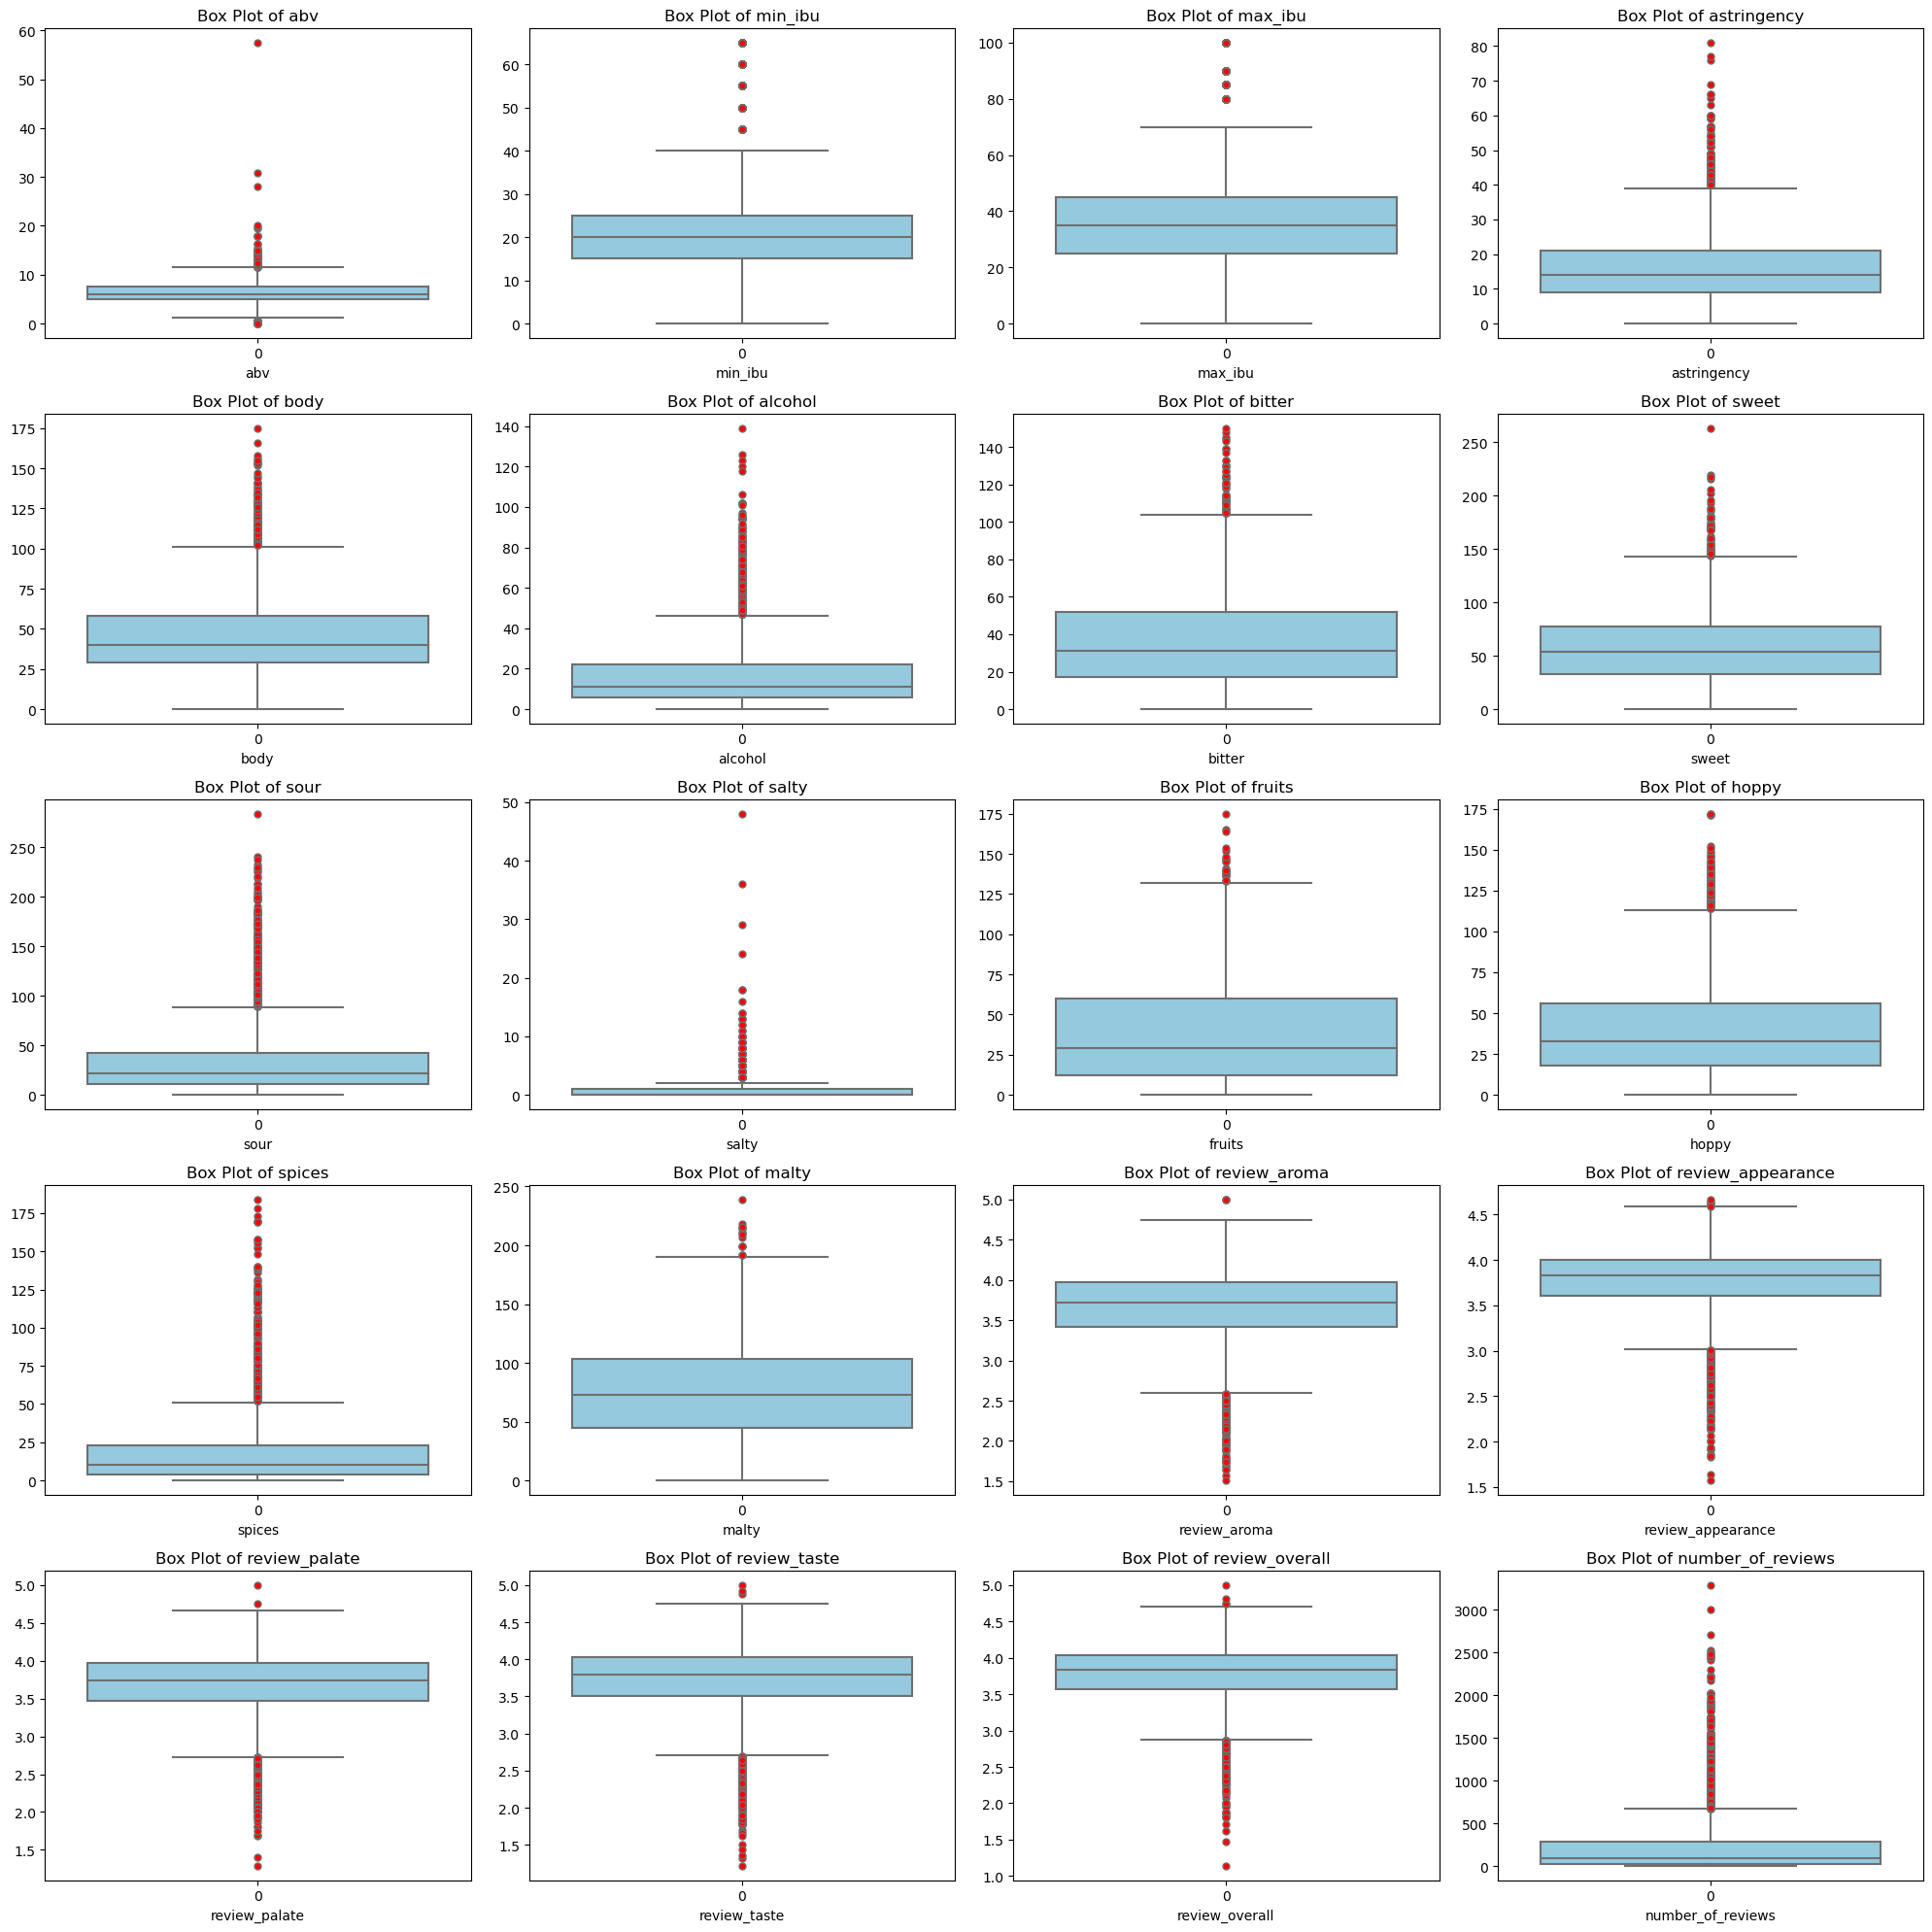

In [49]:
## Box-plot visualizations
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data=beer_df[feature], color='skyblue', flierprops={'markerfacecolor': 'red', 'marker': 'o'})
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

I used the IQR method to formally identify and quantify the outliers in the dataset:

* **IQR Calculation:** I calculated the first quartile (Q1), third quartile (Q3), and the IQR (Q3 - Q1) for each numeric feature.
* **Outlier Boundaries:** Outliers were determined as data points below Q1 - 1.5 * IQR (lower bound) or above Q3 + 1.5 * IQR (upper bound).

##### Outlier Summary

In [50]:
## indentifying and quantifying null values using the IQR method
# Defining quartiles
Q1 = beer_df[numeric_columns].quantile(0.25)
Q3 = beer_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Upper and Lower Limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Indentifying outliers in the dataset
tot_outliers = beer_df[numeric_columns][(beer_df[numeric_columns]<lower_limit) | (beer_df[numeric_columns]>upper_limit)].count()
lower_outliers = beer_df[numeric_columns][(beer_df[numeric_columns]<lower_limit)].count()
upper_outliers = beer_df[numeric_columns][(beer_df[numeric_columns]>upper_limit)].count()

# Display results
print(f"Total number of outliers in the dataset: {tot_outliers.sum()}\n")

# Combine lower and upper outlier counts side by side in a DataFrame
outlier_summary = pd.concat([lower_outliers, upper_outliers], axis=1)
outlier_summary.columns = ['Lower Bound Outliers', 'Upper Bound Outliers']

# Add the total number of outliers row at the bottom
outlier_summary.loc['Total Number of Outliers'] = [lower_outliers.sum(), upper_outliers.sum()]

# Print the summary of lower and upper outliers side by side with the total
print(outlier_summary)

Total number of outliers in the dataset: 3433

                          Lower Bound Outliers  Upper Bound Outliers
abv                                         47                   110
min_ibu                                      0                   267
max_ibu                                      0                   255
astringency                                  0                   106
body                                         0                   132
alcohol                                      0                   227
bitter                                       0                    58
sweet                                        0                    61
sour                                         0                   214
salty                                        0                   443
fruits                                       0                    23
hoppy                                        0                    98
spices                                       0          

From the summary above, we observe a significant number of outliers across many features. Importantly, this dataset consists of unique beers, and the outliers are likely inherent characteristics of particular beers rather than anomalies or data errors. These outliers might represent unique brewing styles, special attributes like high alcohol content, unusual bitterness, or other distinctive qualities that set these beers apart.

Thus, outliers in this dataset can offer valuable insights into the diversity of beers and consumer preferences. Highlighting them rather than eliminating them respects the richness and variability inherent to different brewing techniques and beer styles.

##### Highlighting Outliers

In [51]:
for feature in numeric_columns:
    beer_df[f'{feature}_outlier'] = ((beer_df[feature] < lower_limit.loc[feature]) | (beer_df[feature] > upper_limit.loc[feature])).astype(int)

beer_df.head()

,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,abv_outlier,min_ibu_outlier,max_ibu_outlier,astringency_outlier,body_outlier,alcohol_outlier,bitter_outlier,sweet_outlier,sour_outlier,salty_outlier,fruits_outlier,hoppy_outlier,spices_outlier,malty_outlier,review_aroma_outlier,review_appearance_outlier,review_palate_outlier,review_taste_outlier,review_overall_outlier,number_of_reviews_outlier
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Distribution Analysis

After identifying the outliers, I proceeded to explore the distribution of each numeric column in detail to understand their skewness and the potential issues that could arise during the modeling phase. To do this, I plotted a histogram for each column:

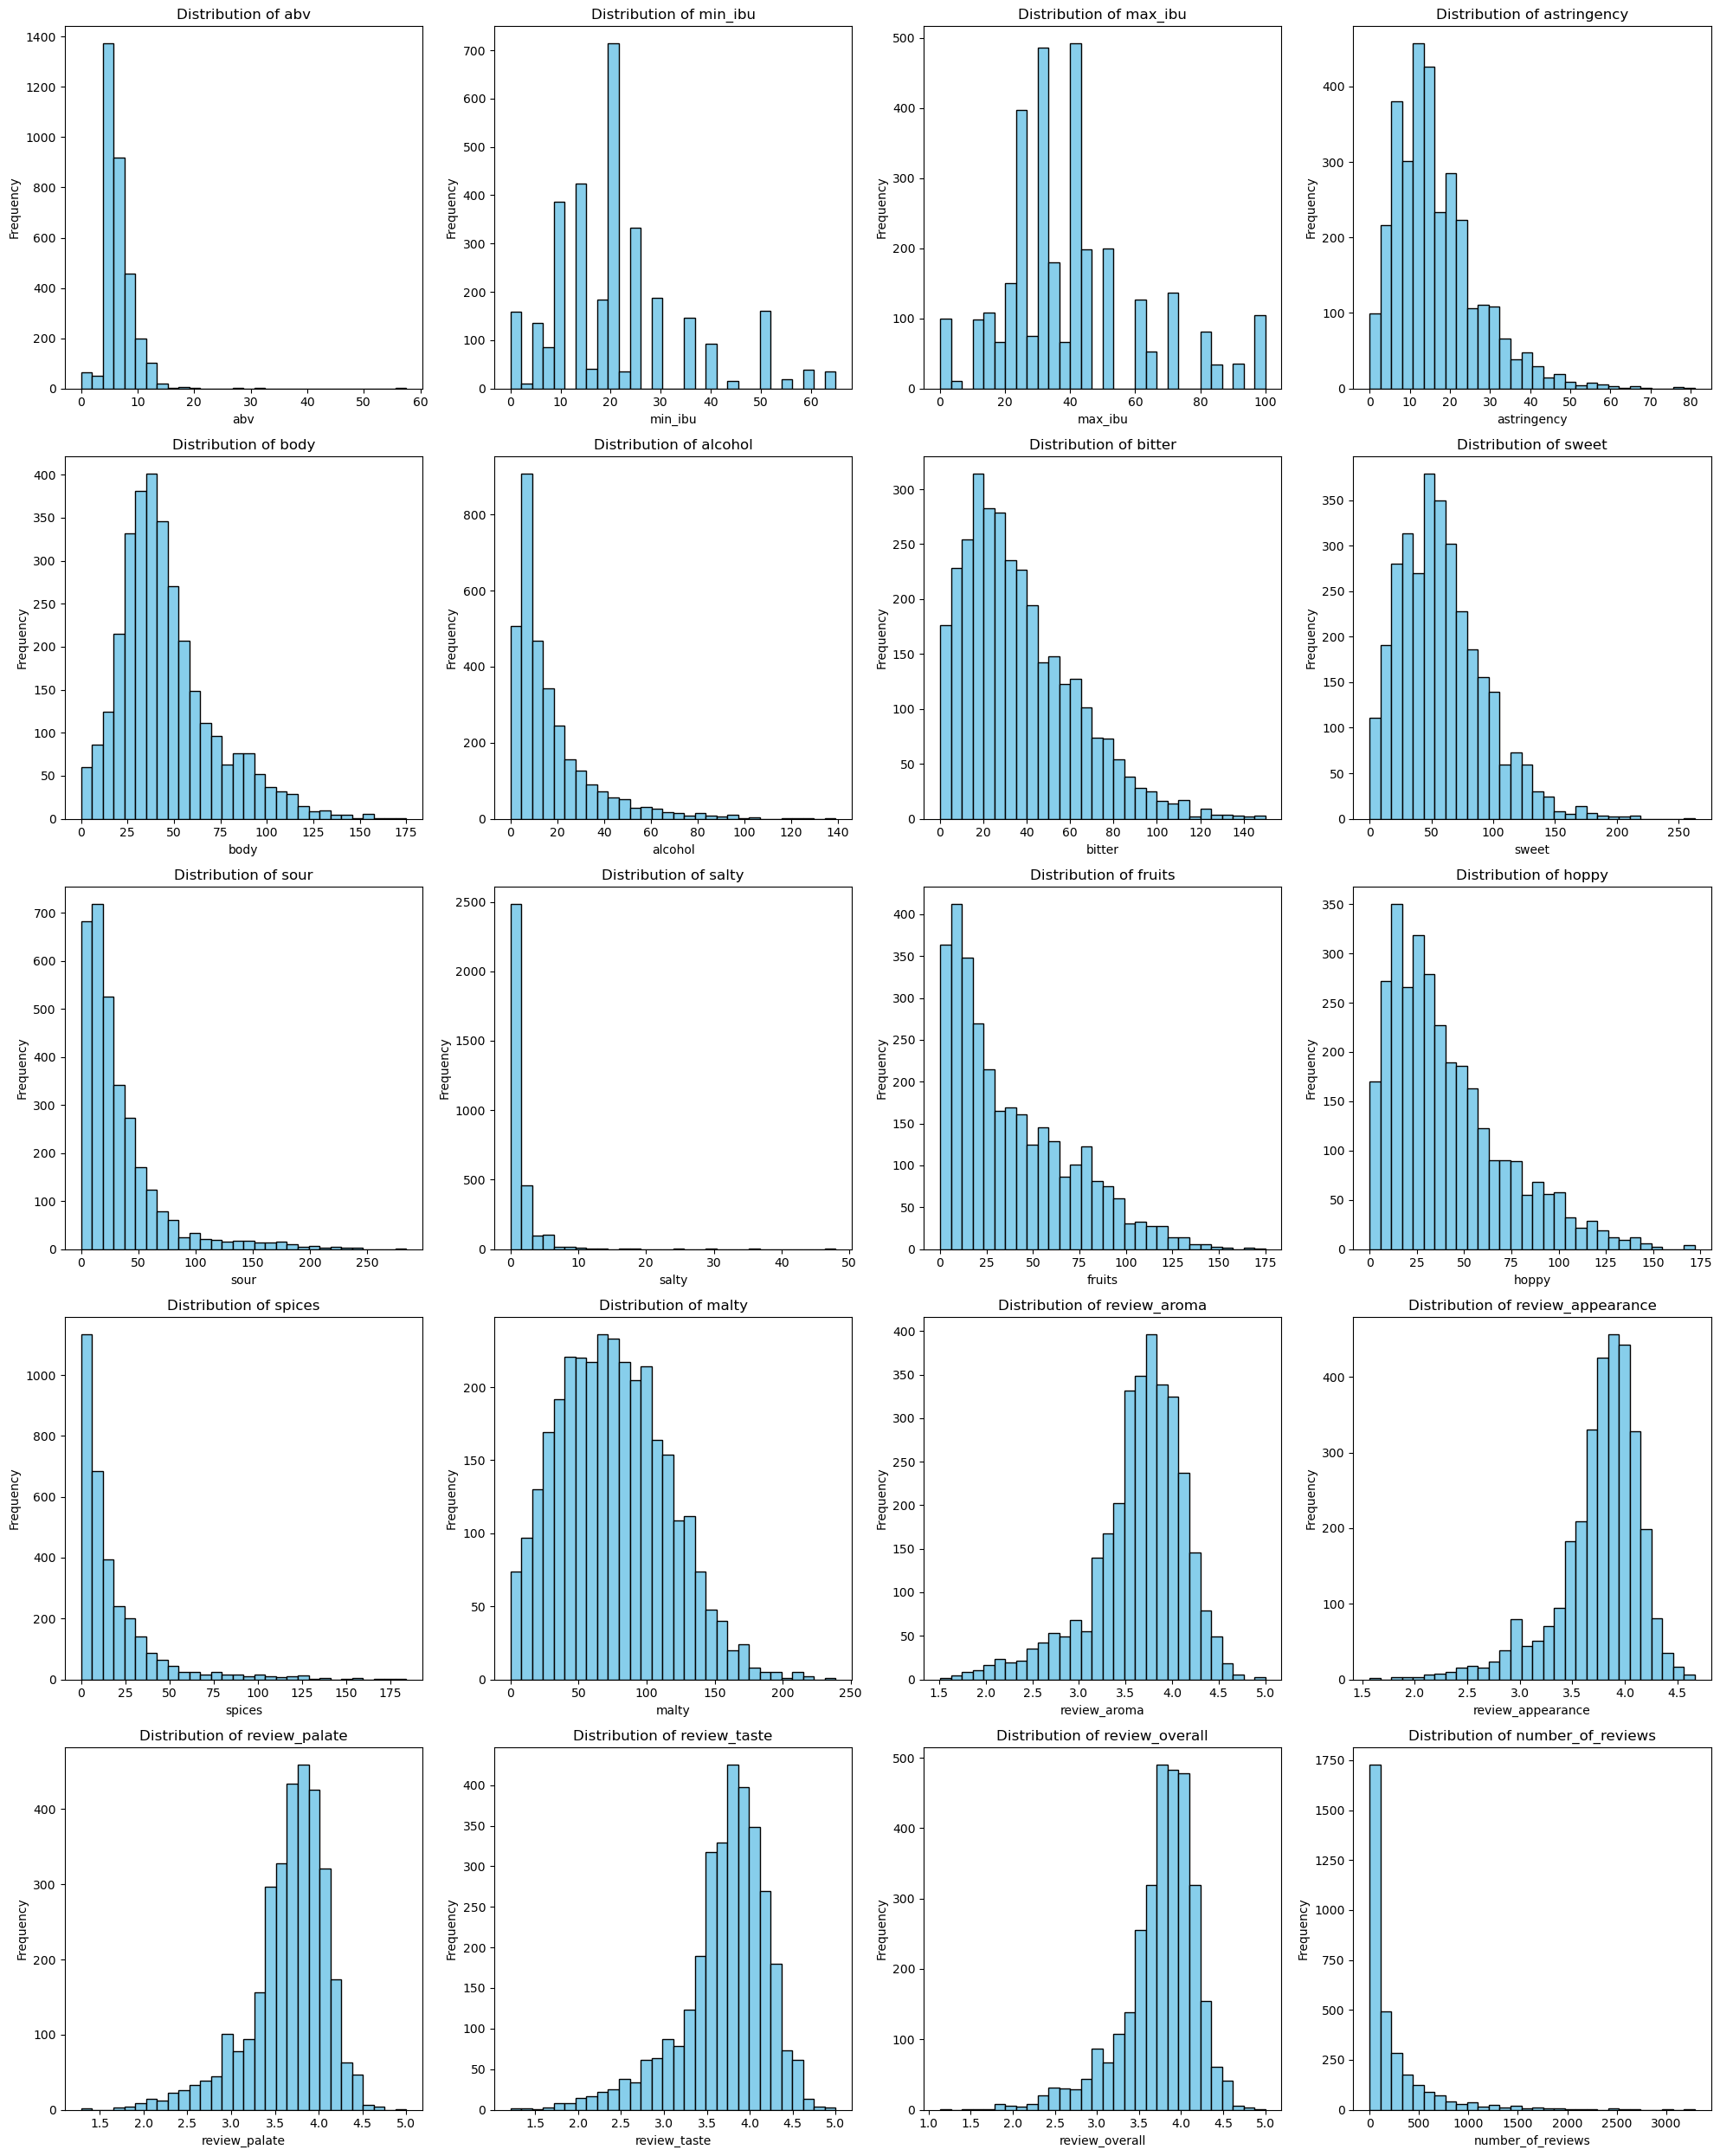

In [52]:
# Plot histograms for each numeric column in a grid layout
num_plots = len(numeric_columns)
cols = 4  # Number of columns in the grid
rows = (num_plots // cols) + (num_plots % cols > 0)  # Determine number of rows

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()  # Flatten axes for easy indexing

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    ax.hist(beer_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


From the distribution plots above, we can see that most features demonstrated skewness, which could pose a challenge in the modeling phase. Skewed distributions can lead to models that are overly sensitive to extreme values, increasing bias and reducing generalization performance.

To mitigate the negative effects of skewed distributions and outliers, I applied the following transformations:
* **Log Transformation (log1p):** Compressed the data range, reducing the impact of extreme values and helping normalize right-skewed distributions, stabilizing variance, and bringing distributions closer to normal shape.

* **Cube Root Transformation (after log1p):** While the log transformation helped reduce extreme skewness, some features remained concentrated in a narrow range due to their extreme skewness. A cube root transformation was applied to further stabilize variance and widened the distribution base, making the data more uniformly spread and mitigating the influence of remaining extreme values.

In [53]:
## Applying transfomations
for col in numeric_columns:
    beer_df[col + "_transformed"] = np.log1p(beer_df[col])
    beer_df[col + "_transformed"] = np.cbrt(beer_df[col + "_transformed"])

# Create a list of columns that have the transformed columns
transformed_columns = [col for col in beer_df.columns if '_transformed' in col]
print(transformed_columns)

beer_df.head()

['abv_transformed', 'min_ibu_transformed', 'max_ibu_transformed', 'astringency_transformed', 'body_transformed', 'alcohol_transformed', 'bitter_transformed', 'sweet_transformed', 'sour_transformed', 'salty_transformed', 'fruits_transformed', 'hoppy_transformed', 'spices_transformed', 'malty_transformed', 'review_aroma_transformed', 'review_appearance_transformed', 'review_palate_transformed', 'review_taste_transformed', 'review_overall_transformed', 'number_of_reviews_transformed']


,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,abv_outlier,min_ibu_outlier,max_ibu_outlier,astringency_outlier,body_outlier,alcohol_outlier,bitter_outlier,sweet_outlier,sour_outlier,salty_outlier,fruits_outlier,hoppy_outlier,spices_outlier,malty_outlier,review_aroma_outlier,review_appearance_outlier,review_palate_outlier,review_taste_outlier,review_overall_outlier,number_of_reviews_outlier,abv_transformed,min_ibu_transformed,max_ibu_transformed,astringency_transformed,body_transformed,alcohol_transformed,bitter_transformed,sweet_transformed,sour_transformed,salty_transformed,fruits_transformed,hoppy_transformed,spices_transformed,malty_transformed,review_aroma_transformed,review_appearance_transformed,review_palate_transformed,review_taste_transformed,review_overall_transformed,number_of_reviews_transformed
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.225507,1.482477,1.578331,1.381920,1.517789,1.320500,1.570177,1.628335,1.522097,0.000000,1.522097,1.595357,1.300044,1.677263,1.145694,1.153306,1.148901,1.153686,1.164314,1.838137
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.368862,1.595357,1.433290,1.522097,1.590748,1.415011,0.000000,1.476504,1.530276,1.368862,1.643920,1.161824,1.164267,1.167196,1.173109,1.173559,1.834910
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.214581,1.482477,1.578331,1.393859,1.537934,1.248459,1.555161,1.558324,1.354472,0.000000,1.338474,1.588371,1.171902,1.606114,1.140587,1.154935,1.151348,1.153007,1.163458,1.810524
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.310621,1.482477,1.578331,1.381920,1.590748,1.513324,1.570177,1.666108,1.433290,0.884997,1.575677,1.548569,1.415011,1.685399,1.178945,1.173543,1.179071,1.181582,1.172166,1.808070
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.482477,1.580925,1.488179,1.561402,1.564402,1.320500,0.884997,1.354472,1.580925,1.449349,1.658796,1.152666,1.170633,1.158500,1.160132,1.162818,1.660050


##### Plotting the distribution of the transformed features

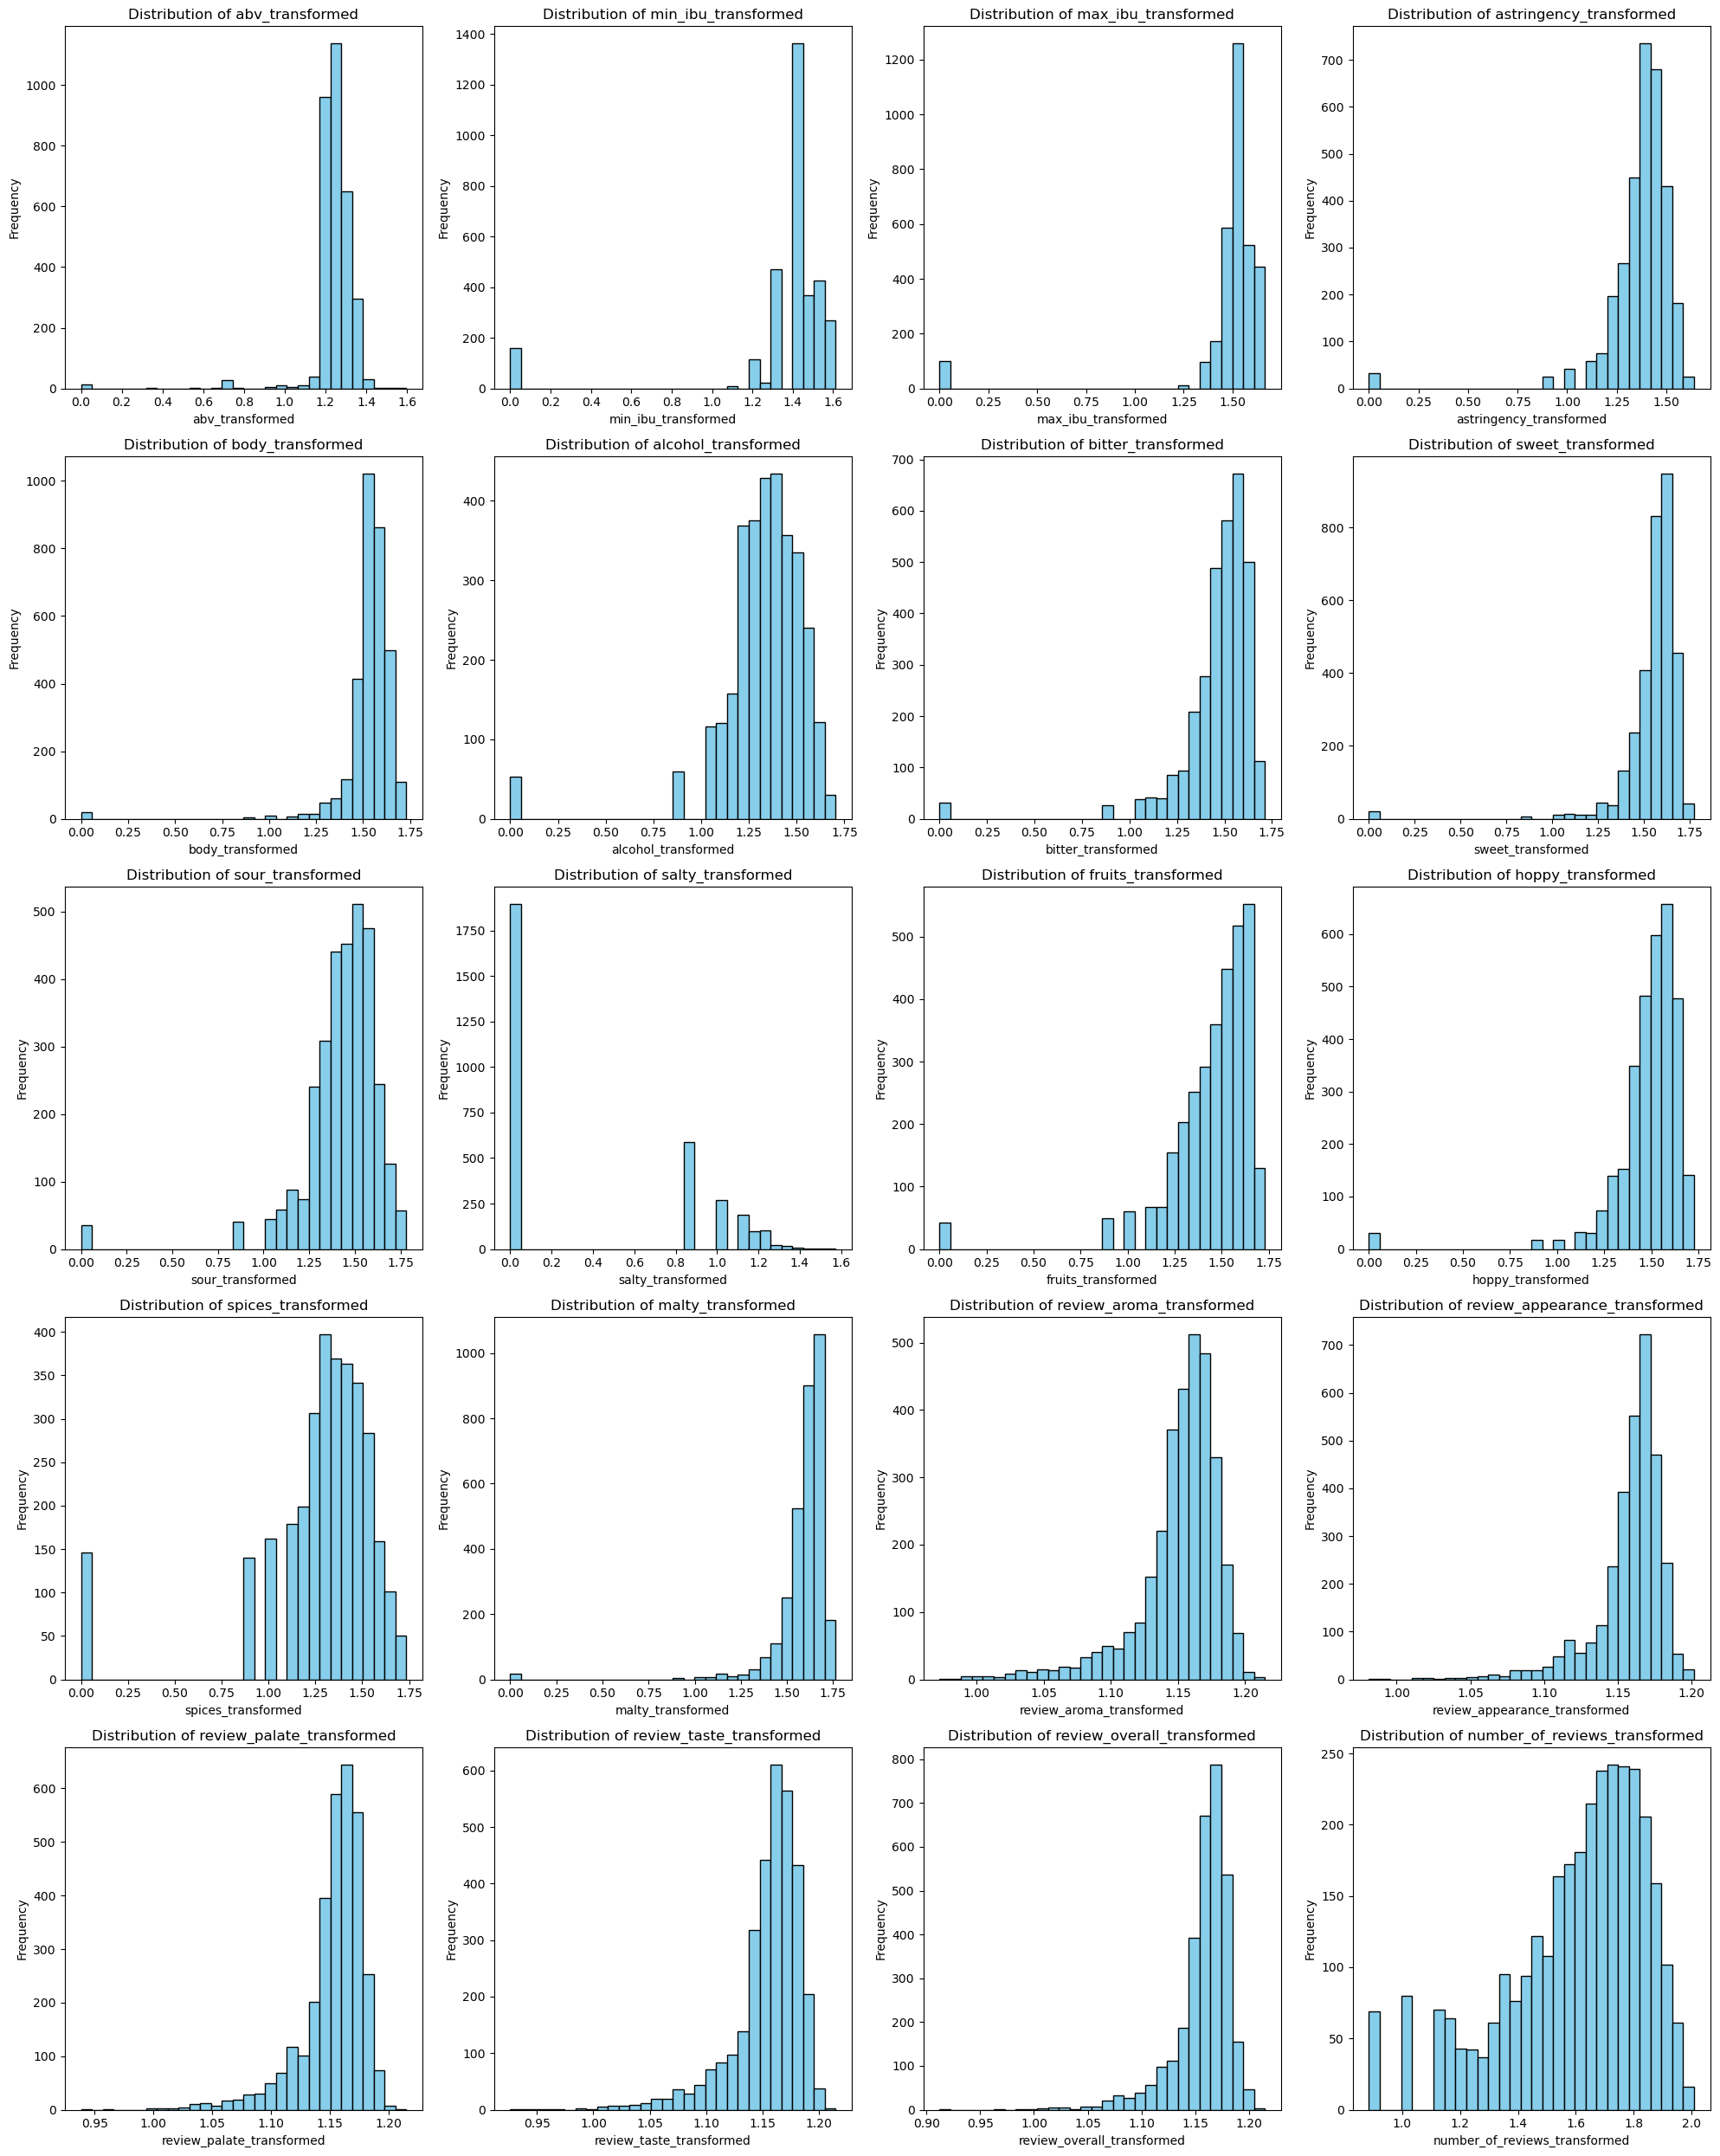

In [54]:
# Plot histograms for each numeric column in a grid layout
num_plots = len(transformed_columns)
cols = 4  # Number of columns in the grid
rows = (num_plots // cols) + (num_plots % cols > 0)  # Determine number of rows

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()  # Flatten axes for easy indexing

for i, col in enumerate(transformed_columns):
    ax = axes[i]
    ax.hist(beer_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The transformations have effectively reduced skewness and compressed extreme tails, resulting in more balanced data. Most features now exhibit a distribution closer to normal, with less influence from extreme values. With these transformed features, the models should be less biased, have lower variance, and be better able to capture underlying relationships in the data. This should lead to more stable model training and better generalization. 

### Categorical Features Exploration

In [55]:
cat_columns = beer_df.select_dtypes(include=['object', 'category']).columns
print(cat_columns)
print(f"There is {len(cat_columns)} categorical features.")
beer_df[cat_columns].head()

Index(['name', 'style', 'brewery', 'beer_name_full', 'description'], dtype='object')
There is 5 categorical features.


,name,style,brewery,beer_name_full,description
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit..."
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al..."
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...


In [56]:
# Loop through each categorical column and print value counts
for col in cat_columns:
    print(f"Column '{col}' has {beer_df[col].nunique()} unique values.")
    print(f"Value counts for column '{col}':")
    print(beer_df[col].value_counts())
    print("\n" + "-"*50 + "\n")


Column 'name' has 3066 unique values.
Value counts for column 'name':
name
Oktoberfest                                 12
Porter                                      10
Smoked Porter                                9
Christmas Ale                                6
IPA                                          5
                                            ..
Vinyl                                        1
Barking Squirrel Lager                       1
Redbridge                                    1
ZiegenBock Amber                             1
Frosted Frog Christmas Ale - Barrel-Aged     1
Name: count, Length: 3066, dtype: int64

--------------------------------------------------

Column 'style' has 111 unique values.
Value counts for column 'style':
style
Lager - Adjunct                    45
Lager - European Pale              43
Wheat Beer - Hefeweizen            42
Stout - Irish Dry                  42
Lambic - Fruit                     42
                                   ..
Bière de C

##### style

In [57]:
beer_df['style'].unique()

array(['Altbier', 'Barleywine - American', 'Barleywine - English',
       'Bitter - English Extra Special / Strong Bitter (ESB)',
       'Bitter - English', 'Bière de Champagne / Bière Brut',
       'Blonde Ale - American', 'Blonde Ale - Belgian',
       'Bock - Doppelbock', 'Bock - Eisbock', 'Bock - Maibock',
       'Bock - Traditional', 'Bock - Weizenbock', 'Braggot', 'Brett Beer',
       'Brown Ale - American', 'Brown Ale - Belgian Dark',
       'Brown Ale - English', 'California Common / Steam Beer',
       'Chile Beer', 'Cream Ale', 'Dubbel',
       'Farmhouse Ale - Bière de Garde', 'Farmhouse Ale - Sahti',
       'Farmhouse Ale - Saison', 'Fruit and Field Beer',
       'Gruit / Ancient Herbed Ale', 'Happoshu', 'Herb and Spice Beer',
       'IPA - American', 'IPA - Belgian',
       'IPA - Black / Cascadian Dark Ale', 'IPA - English',
       'IPA - Imperial', 'IPA - New England', 'Kvass', 'Kölsch',
       'Lager - Adjunct', 'Lager - American Amber / Red',
       'Lager - American',

Given the unique values of the column `style`, I splitted it into two, `style` and `sub_style` on `-`. 

In [58]:
# Split the 'style' column into 'style' and 'sub_style' based on the delimiter '-'
style_split = beer_df['style'].str.split("-", n=1, expand=True)

beer_df['style_main'] = style_split[0].str.strip() 
beer_df['style_sub'] = style_split[1].str.strip()  

print(beer_df[['style_main', 'style_sub']].drop_duplicates())


         style_main                                    style_sub
0           Altbier                                         None
39       Barleywine                                     American
77       Barleywine                                      English
103          Bitter  English Extra Special / Strong Bitter (ESB)
136          Bitter                                      English
...             ...                                          ...
3057     Wheat Beer                               Kristallweizen
3083     Wheat Beer                                    Wheatwine
3098     Wheat Beer                                      Witbier
3134       Wild Ale                                         None
3157  Winter Warmer                                         None

[111 rows x 2 columns]


In [59]:
print(beer_df['style_main'].nunique())
beer_df['style_main'].unique()

43


array(['Altbier', 'Barleywine', 'Bitter',
       'Bière de Champagne / Bière Brut', 'Blonde Ale', 'Bock', 'Braggot',
       'Brett Beer', 'Brown Ale', 'California Common / Steam Beer',
       'Chile Beer', 'Cream Ale', 'Dubbel', 'Farmhouse Ale',
       'Fruit and Field Beer', 'Gruit / Ancient Herbed Ale', 'Happoshu',
       'Herb and Spice Beer', 'IPA', 'Kvass', 'Kölsch', 'Lager', 'Lambic',
       'Low Alcohol Beer', 'Mild Ale', 'Old Ale', 'Pale Ale', 'Pilsner',
       'Porter', 'Pumpkin Beer', 'Quadrupel (Quad)', 'Red Ale',
       'Rye Beer', 'Scotch Ale / Wee Heavy', 'Scottish Ale',
       'Smoked Beer', 'Sour', 'Stout', 'Strong Ale', 'Tripel',
       'Wheat Beer', 'Wild Ale', 'Winter Warmer'], dtype=object)

By doing this split, I was able to make the style broader, which will likely help on the classification task. 

#### Potential Issue

Given the high cardinality of the categorical features, traditional encoders may be impractical. Therefore, I chose Label Encoding, which avoids overcomplicating and overfitting the model by assigning a unique integer to each category.

Label Encoding is well-suited for high cardinality as it provides a compact representation without increasing dimensionality, making it efficient for models that can handle numeric features directly.

In [100]:
# Dictionary to store LabelEncoders for each categorical feature
label_encoders = {}

# Apply label encoding to each categorical feature and drop the original
cat_columns = beer_df.select_dtypes(include=['object', 'category']).columns
for feature in cat_columns:
    # Create a LabelEncoder instance for each feature and store it
    label_encoders[feature] = LabelEncoder()
    beer_df[f'{feature}_label_encoded'] = label_encoders[feature].fit_transform(beer_df[feature])

# Create a list of columns that have the labeled columns
labeled_columns = [col for col in beer_df.columns if '_label_encoded' in col]
print(labeled_columns)

# Display the first few rows of the encoded DataFrame
beer_df.head()


['name_label_encoded', 'style_label_encoded', 'brewery_label_encoded', 'beer_name_full_label_encoded', 'description_label_encoded', 'style_main_label_encoded', 'style_sub_label_encoded']


,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,abv_outlier,min_ibu_outlier,max_ibu_outlier,astringency_outlier,body_outlier,alcohol_outlier,bitter_outlier,sweet_outlier,sour_outlier,salty_outlier,fruits_outlier,hoppy_outlier,spices_outlier,malty_outlier,review_aroma_outlier,review_appearance_outlier,review_palate_outlier,review_taste_outlier,review_overall_outlier,number_of_reviews_outlier,abv_transformed,min_ibu_transformed,max_ibu_transformed,astringency_transformed,body_transformed,alcohol_transformed,bitter_transformed,sweet_transformed,sour_transformed,salty_transformed,fruits_transformed,hoppy_transformed,spices_transformed,malty_transformed,review_aroma_transformed,review_appearance_transformed,review_palate_transformed,review_taste_transformed,review_overall_transformed,number_of_reviews_transformed,style_main,style_sub,name_label_encoded,style_label_encoded,brewery_label_encoded,beer_name_full_label_encoded,description_label_encoded,style_main_label_encoded,style_sub_label_encoded
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.225507,1.482477,1.578331,1.381920,1.517789,1.320500,1.570177,1.628335,1.522097,0.000000,1.522097,1.595357,1.300044,1.677263,1.145694,1.153306,1.148901,1.153686,1.164314,1.838137,Altbier,None,109,0,13,39,1364,0,63
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.368862,1.595357,1.433290,1.522097,1.590748,1.415011,0.000000,1.476504,1.530276,1.368862,1.643920,1.161824,1.164267,1.167196,1.173109,1.173559,1.834910,Altbier,None,784,0,560,1927,1659,0,63
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.214581,1.482477,1.578331,1.393859,1.537934,1.248459,1.555161,1.558324,1.354472,0.000000,1.338474,1.588371,1.171902,1.606114,1.140587,1.154935,1.151348,1.153007,1.163458,1.810524,Altbier,None,1627,0,560,1930,1061,0,63
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.310621,1.482477,1.578331,1.381920,1.590748,1.513324,1.570177,1.666108,1.433290,0.884997,1.575677,1.548569,1.415011,1.685399,1.178945,1.173543,1.179071,1.181582,1.172166,1.808070,Altbier,None,773,0,879,3018,0,0,63
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.482477,1.580925,1.488179,1.561402,1.564402,1.320500,0.884997,1.354472,1.580925,1.449349,1.658796,1.152666,1.170633,1.158500,1.160132,1.162818,1.660050,Altbier,None,2506,0,643,2189,579,0,63


In [218]:
# # ----- After running the model, transform the encoded columns back -----

# # Reverse transformation for all encoded columns
# for feature in cat_columns:
#     # Use the stored label encoder to reverse transform
#     beer_df[feature] = label_encoders[feature].inverse_transform(beer_df[f'{feature}_label_encoded'])

# # Drop the label encoded columns after reverse transformation
# beer_df.drop(columns=[f'{feature}_label_encoded' for feature in cat_columns], inplace=True)

# # Display the first few rows of the DataFrame with original categorical values
# beer_df.head()

#### Exploring relationships

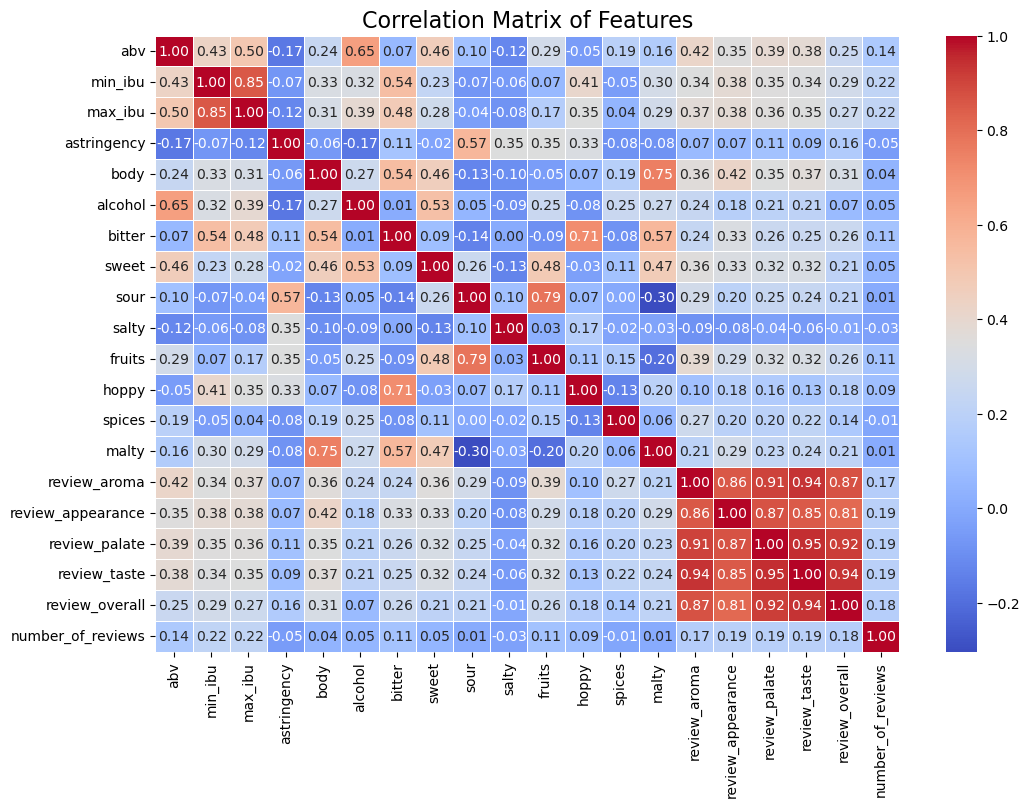

In [219]:
# Calculate the correlation matrix
correlation_matrix = beer_df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

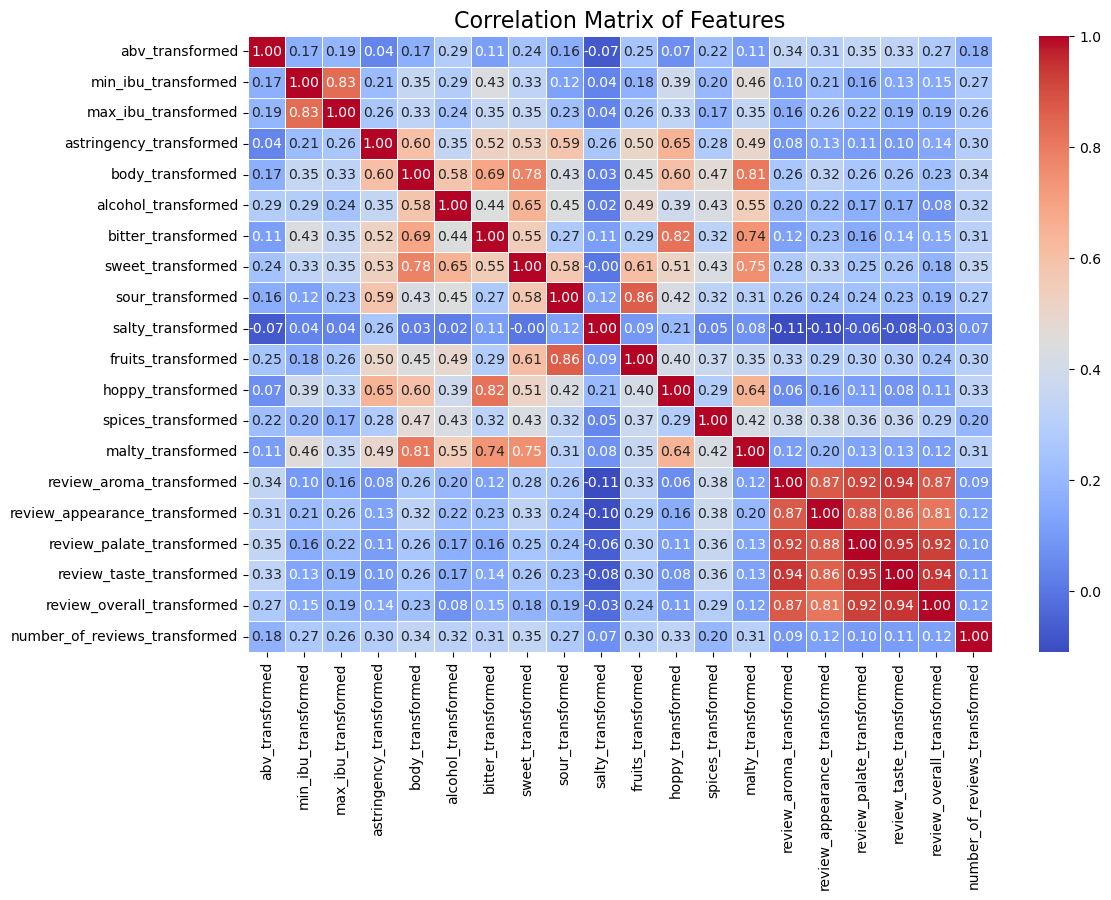

In [220]:
# Calculate the correlation matrix
correlation_matrix = beer_df[transformed_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

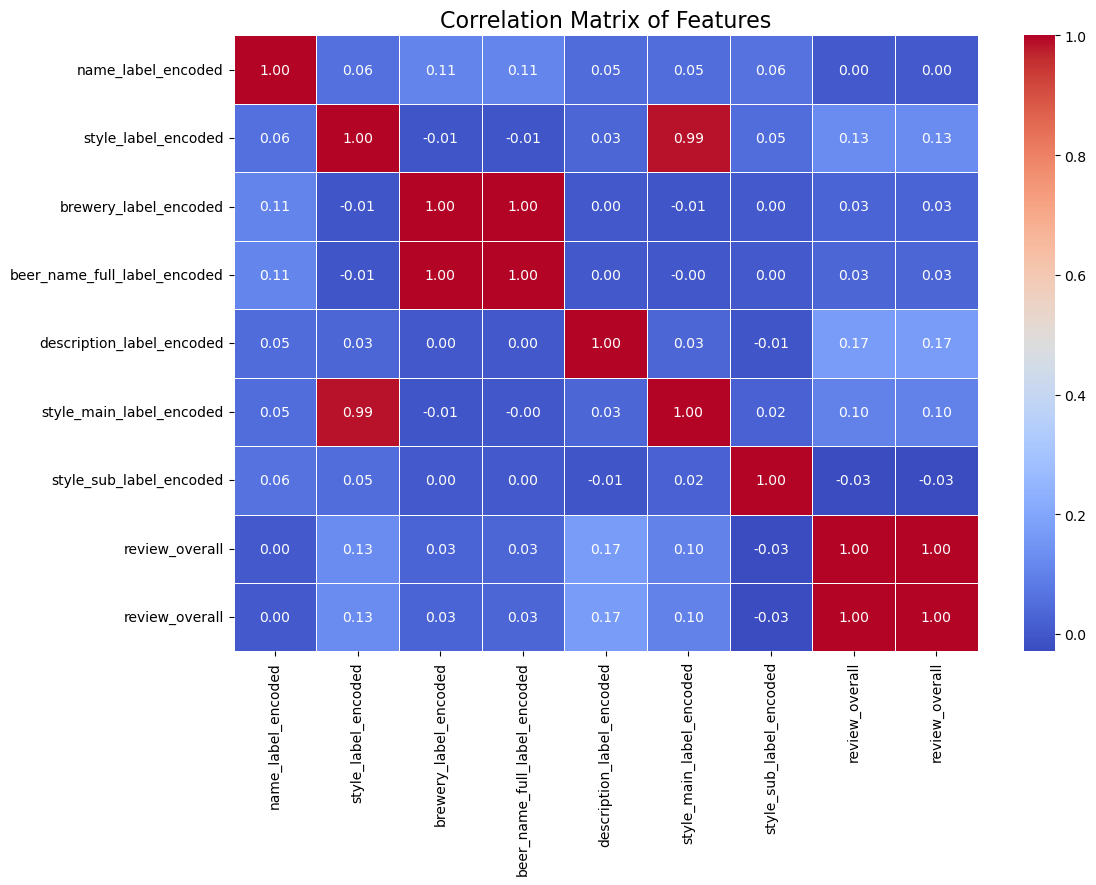

In [222]:
labeled_columns_cor = labeled_columns
labeled_columns_cor.append("review_overall") 

# Calculate the correlation matrix
correlation_matrix = beer_df[labeled_columns_cor].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

The correlation matrices provided a solid overview of the relationships among all features. However, I will treat all features as hyperparameters and perform feature selection based on feature importance for each model.

#### Exporting trasformed data

In [223]:
# Data location
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/"
file_name = "beer_profile_and_ratings_trasformed.csv"

# Exporting final dataset
beer_df.to_csv(data_loc + file_name, index=False)

### Problem 2. (25 points)

Using the best cross-validated regression model, selected from the pool of models you trained (you determine how many and which models to optimize your evaluation metrics), report key performance metrics such as Root Mean Squared Error (RMSE) and R² on both the training and test sets. These metrics will provide insights into how well the model generalizes to unseen data. Once the model demonstrates strong performance, apply it to predict the overall review rating (review_overall) for a new beer, "HopDevil IPA," using the provided data below. Note that the HopDevil IPA data contains several missing values. Explain how you will handle these missing values to make sure that the model can make a prediction.

## Libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import warnings
import matplotlib.pyplot as plt
import re

# Data prep for modeling
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler


# Modeling
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
# from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, plot_importance
from catboost import CatBoostRegressor

# Additional Config
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Import Transformed DF

In [86]:
# Data location
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/"
file_name = "beer_profile_and_ratings_trasformed.csv"

# Import DF
beer_df_transf = pd.read_csv(data_loc + file_name)
beer_df_transf.head()

,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,abv_outlier,min_ibu_outlier,max_ibu_outlier,astringency_outlier,body_outlier,alcohol_outlier,bitter_outlier,sweet_outlier,sour_outlier,salty_outlier,fruits_outlier,hoppy_outlier,spices_outlier,malty_outlier,review_aroma_outlier,review_appearance_outlier,review_palate_outlier,review_taste_outlier,review_overall_outlier,number_of_reviews_outlier,abv_transformed,min_ibu_transformed,max_ibu_transformed,astringency_transformed,body_transformed,alcohol_transformed,bitter_transformed,sweet_transformed,sour_transformed,salty_transformed,fruits_transformed,hoppy_transformed,spices_transformed,malty_transformed,review_aroma_transformed,review_appearance_transformed,review_palate_transformed,review_taste_transformed,review_overall_transformed,number_of_reviews_transformed,style_main,style_sub,name_label_encoded,style_label_encoded,brewery_label_encoded,beer_name_full_label_encoded,description_label_encoded,style_main_label_encoded,style_sub_label_encoded
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.225507,1.482477,1.578331,1.381920,1.517789,1.320500,1.570177,1.628335,1.522097,0.000000,1.522097,1.595357,1.300044,1.677263,1.145694,1.153306,1.148901,1.153686,1.164314,1.838137,Altbier,NaN,109,0,13,39,1364,0,63
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.368862,1.595357,1.433290,1.522097,1.590748,1.415011,0.000000,1.476504,1.530276,1.368862,1.643920,1.161824,1.164267,1.167196,1.173109,1.173559,1.834910,Altbier,NaN,784,0,560,1927,1659,0,63
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.214581,1.482477,1.578331,1.393859,1.537934,1.248459,1.555161,1.558324,1.354472,0.000000,1.338474,1.588371,1.171902,1.606114,1.140587,1.154935,1.151348,1.153007,1.163458,1.810524,Altbier,NaN,1627,0,560,1930,1061,0,63
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.310621,1.482477,1.578331,1.381920,1.590748,1.513324,1.570177,1.666108,1.433290,0.884997,1.575677,1.548569,1.415011,1.685399,1.178945,1.173543,1.179071,1.181582,1.172166,1.808070,Altbier,NaN,773,0,879,3018,0,0,63
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.482477,1.580925,1.488179,1.561402,1.564402,1.320500,0.884997,1.354472,1.580925,1.449349,1.658796,1.152666,1.170633,1.158500,1.160132,1.162818,1.660050,Altbier,NaN,2506,0,643,2189,579,0,63


## Splitting the data into train and test

In [87]:
# Drop the categorical columns
cat_columns = beer_df_transf.select_dtypes(include=['object', 'category']).columns
beer_df_numeric = beer_df_transf.copy()
beer_df_numeric.drop(columns=cat_columns, inplace=True)
beer_df_numeric.head()

,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,abv_outlier,min_ibu_outlier,max_ibu_outlier,astringency_outlier,body_outlier,alcohol_outlier,bitter_outlier,sweet_outlier,sour_outlier,salty_outlier,fruits_outlier,hoppy_outlier,spices_outlier,malty_outlier,review_aroma_outlier,review_appearance_outlier,review_palate_outlier,review_taste_outlier,review_overall_outlier,number_of_reviews_outlier,abv_transformed,min_ibu_transformed,max_ibu_transformed,astringency_transformed,body_transformed,alcohol_transformed,bitter_transformed,sweet_transformed,sour_transformed,salty_transformed,fruits_transformed,hoppy_transformed,spices_transformed,malty_transformed,review_aroma_transformed,review_appearance_transformed,review_palate_transformed,review_taste_transformed,review_overall_transformed,number_of_reviews_transformed,name_label_encoded,style_label_encoded,brewery_label_encoded,beer_name_full_label_encoded,description_label_encoded,style_main_label_encoded,style_sub_label_encoded
0,5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.225507,1.482477,1.578331,1.381920,1.517789,1.320500,1.570177,1.628335,1.522097,0.000000,1.522097,1.595357,1.300044,1.677263,1.145694,1.153306,1.148901,1.153686,1.164314,1.838137,109,0,13,39,1364,0,63
1,7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.368862,1.595357,1.433290,1.522097,1.590748,1.415011,0.000000,1.476504,1.530276,1.368862,1.643920,1.161824,1.164267,1.167196,1.173109,1.173559,1.834910,784,0,560,1927,1659,0,63
2,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.214581,1.482477,1.578331,1.393859,1.537934,1.248459,1.555161,1.558324,1.354472,0.000000,1.338474,1.588371,1.171902,1.606114,1.140587,1.154935,1.151348,1.153007,1.163458,1.810524,1627,0,560,1930,1061,0,63
3,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.310621,1.482477,1.578331,1.381920,1.590748,1.513324,1.570177,1.666108,1.433290,0.884997,1.575677,1.548569,1.415011,1.685399,1.178945,1.173543,1.179071,1.181582,1.172166,1.808070,773,0,879,3018,0,0,63
4,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.482477,1.580925,1.488179,1.561402,1.564402,1.320500,0.884997,1.354472,1.580925,1.449349,1.658796,1.152666,1.170633,1.158500,1.160132,1.162818,1.660050,2506,0,643,2189,579,0,63


In [88]:
# Predictor Features
X = beer_df_numeric.drop(columns=['review_overall', 'review_overall_transformed', 'review_overall_outlier'])

# targetbeer_df_numeric feature
y = beer_df_numeric['review_overall']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

print(f'Training set dimensions: {X_train.shape}, {y_train.shape}')
print(f'Testing set dimensions: {X_test.shape}, {y_test.shape}')

Training set dimensions: (2557, 64), (2557,)
Testing set dimensions: (640, 64), (640,)


### Modeling
* *Models to be considered:* 
    - Gradient Boosting Regressor
    - XGBoost Regressor
    - CatBoost Regressor

#### Create Dataset to store results

In [89]:
# Performance
performance_df=pd.DataFrame()

# Predictions
results_train = pd.DataFrame({'True Results': y_train})
results_test = pd.DataFrame({'True Results': y_test})

#### Gradient Boosting
##### Feature Selection

Top 10 Features by Importance (Gradient Boosting):
                     Feature  Importance
0   review_taste_transformed    0.393225
1               review_taste    0.344547
2  review_palate_transformed    0.116207
3              review_palate    0.088803
4            abv_transformed    0.005929
5                    alcohol    0.005909
6        alcohol_transformed    0.005671
7                        abv    0.004867
8   review_aroma_transformed    0.004252
9                      sweet    0.002608


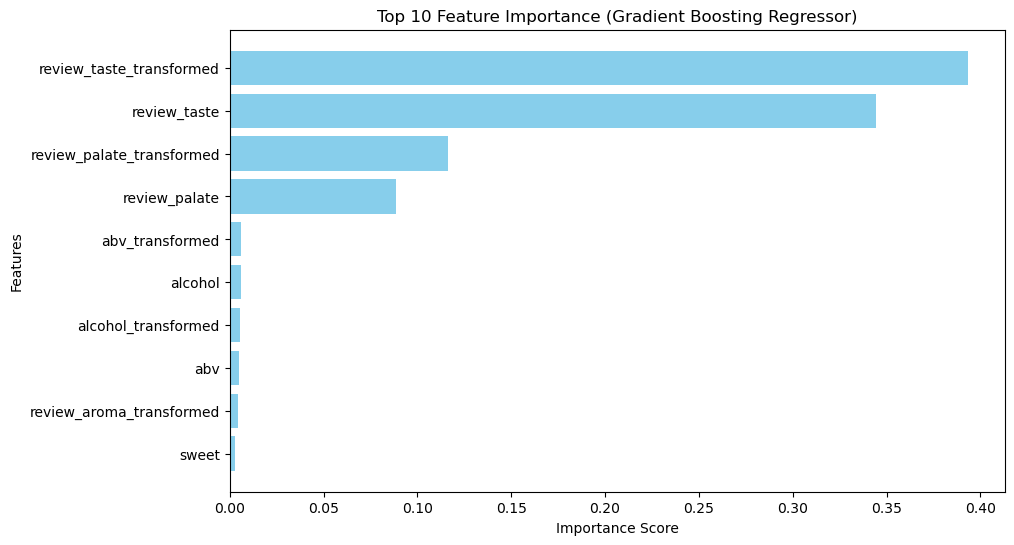

In [64]:
# Building the Gradient Boosting model
gb_feature_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_feature_model.fit(X_train, y_train)

# Extract feature importance and select top 10 features
gb_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_feature_model.feature_importances_
})
gb_top_10_features = gb_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (Gradient Boosting):")
print(gb_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(gb_top_10_features['Feature'], gb_top_10_features['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (Gradient Boosting Regressor)")
plt.gca().invert_yaxis()
plt.show()

##### Model Training and Evaluation

In [90]:
# Model Name
current_model = "GradientBoostingRegressor"
current_model_short = "GBR"

# Select top features
best_features = gb_top_10_features['Feature'][0:5]
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Define parameter grid for GridSearch
param_grid = {
    'alpha': [0.5, 0.9],
    'learning_rate': [0.1,0.3]
}

# Perform Grid Search with Cross-Validation
optimal_gbr = GridSearchCV(gbr, param_grid, cv=5, scoring='r2', n_jobs=-1)
optimal_gbr.fit(X_train_best, y_train)

# Extract best parameters dynamically
best_params = optimal_gbr.best_params_
hyperparameters_str = ', '.join([f'{param}={value}' for param, value in best_params.items()])

# Calculate RMSE for training and testing sets
rmse_train = -cross_val_score(optimal_gbr, X_train_best, y_train, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_test = -cross_val_score(optimal_gbr, X_test_best, y_test, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_train_mean, rmse_train_std = rmse_train.mean(), rmse_train.std()
rmse_test_mean, rmse_test_std = rmse_test.mean(), rmse_test.std()

# Calculate R-squared for training and testing sets
rsquared_train = cross_val_score(optimal_gbr, X_train_best, y_train, cv=10, scoring='r2', n_jobs=-1)
rsquared_test = cross_val_score(optimal_gbr, X_test_best, y_test, cv=10, scoring='r2', n_jobs=-1)
rsquared_train_mean, rsquared_train_std = rsquared_train.mean(), rsquared_train.std()
rsquared_test_mean, rsquared_test_std = rsquared_test.mean(), rsquared_test.std()

# Predict on training and testing sets
results_train[current_model_short + "_pred"] = optimal_gbr.predict(X_train_best)
results_test[current_model_short + "_pred"] = optimal_gbr.predict(X_test_best)

# Create metrics DataFrame
current_metrics = pd.DataFrame({
    'Model': current_model,
    'Hyperparameters': [hyperparameters_str],
    'Test  R\u00b2 (Mean)': [round(rsquared_test_mean, 4)],
    'Test  R\u00b2 (Std Dev)': [round(rsquared_test_std, 4)],
    'Test RMSE (Mean)': [round(rmse_test_mean, 1)],
    'Test RMSE (Std Dev)': [round(rmse_test_std, 3)],
    'Train  R\u00b2 (Mean)': [round(rsquared_train_mean, 4)],
    'Train  R\u00b2 (Std Dev)': [round(rsquared_train_std, 4)],
    'Train RMSE (Mean)': [round(rmse_train_mean, 1)],
    'Train RMSE (Std Dev)': [round(rmse_train_std, 3)],
    'Number of Train Features': [len(best_features)],
    'Train Features': [list(best_features)]
})

# Append metrics to performance DataFrame
performance_df = pd.concat([performance_df, current_metrics])
performance_df.head()

,Model,Hyperparameters,Test R² (Mean),Test R² (Std Dev),Test RMSE (Mean),Test RMSE (Std Dev),Train R² (Mean),Train R² (Std Dev),Train RMSE (Mean),Train RMSE (Std Dev),Number of Train Features,Train Features
0,GradientBoostingRegressor,"alpha=0.9, learning_rate=0.1",0.8306,0.1046,0.2,0.045,0.911,0.0245,0.1,0.011,5,"[review_taste_transformed, review_taste, revie..."


#### XGBoost Regressor
##### Feature Selection

Top 10 Features by Importance (XGBoost):
                Feature  Importance
0          review_taste    6.111363
1         review_palate    0.893767
2  review_taste_outlier    0.302967
3               alcohol    0.114399
4                   abv    0.078486
5                 sweet    0.067929
6     review_appearance    0.066148
7          review_aroma    0.066089
8               min_ibu    0.065223
9     number_of_reviews    0.065130


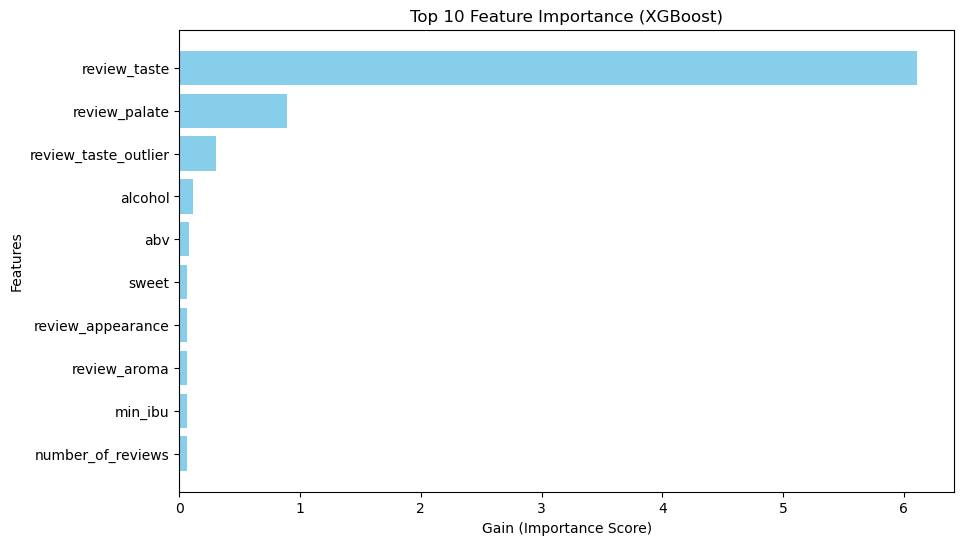

In [31]:
# Building the XGBRegressor model
xgb_feature_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_feature_model.fit(X_train, y_train)

# Extract feature importance using get_booster().get_score()
booster = xgb_feature_model.get_booster()
importance_dict = booster.get_score(importance_type='gain')

# Convert the importance dictionary to a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': [f for f in importance_dict.keys()],
    'Importance': [importance_dict[f] for f in importance_dict.keys()]
})

# Sort by importance and select top 10
xgb_top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (XGBoost):")
print(xgb_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(xgb_top_10_features['Feature'], xgb_top_10_features['Importance'], color='skyblue')
plt.xlabel("Gain (Importance Score)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (XGBoost)")
plt.gca().invert_yaxis()
plt.show()

##### Model Training and Evaluation

In [32]:
# Model Name
current_model = "XGBRegressor"
current_model_short = "XGB"

# Select top features
best_features = xgb_top_10_features['Feature'][0:5]
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Initialize the Gradient Boosting Regressor
xgb = XGBRegressor()

# Define parameter grid for GridSearch
param_grid = {
    'learning_rate': [0.1, 0.3,0.6],
    'max_depth': [3,6]
}

# Perform Grid Search with Cross-Validation
optimal_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1)
optimal_xgb.fit(X_train_best, y_train)

# Extract best parameters dynamically
best_params = optimal_xgb.best_params_
hyperparameters_str = ', '.join([f'{param}={value}' for param, value in best_params.items()])

# Calculate RMSE for training and testing sets
rmse_train = -cross_val_score(optimal_xgb, X_train_best, y_train, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_test = -cross_val_score(optimal_xgb, X_test_best, y_test, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_train_mean, rmse_train_std = rmse_train.mean(), rmse_train.std()
rmse_test_mean, rmse_test_std = rmse_test.mean(), rmse_test.std()

# Calculate R-squared for training and testing sets
rsquared_train = cross_val_score(optimal_xgb, X_train_best, y_train, cv=10, scoring='r2', n_jobs=-1)
rsquared_test = cross_val_score(optimal_xgb, X_test_best, y_test, cv=10, scoring='r2', n_jobs=-1)
rsquared_train_mean, rsquared_train_std = rsquared_train.mean(), rsquared_train.std()
rsquared_test_mean, rsquared_test_std = rsquared_test.mean(), rsquared_test.std()

# Predict on training and testing sets
results_train[current_model_short + "_pred"] = optimal_xgb.predict(X_train_best)
results_test[current_model_short + "_pred"] = optimal_xgb.predict(X_test_best)

# Create metrics DataFrame
current_metrics = pd.DataFrame({
    'Model': current_model,
    'Hyperparameters': [hyperparameters_str],
    'Test  R\u00b2 (Mean)': [round(rsquared_test_mean, 4)],
    'Test  R\u00b2 (Std Dev)': [round(rsquared_test_std, 4)],
    'Test RMSE (Mean)': [round(rmse_test_mean, 1)],
    'Test RMSE (Std Dev)': [round(rmse_test_std, 3)],
    'Train  R\u00b2 (Mean)': [round(rsquared_train_mean, 4)],
    'Train  R\u00b2 (Std Dev)': [round(rsquared_train_std, 4)],
    'Train RMSE (Mean)': [round(rmse_train_mean, 1)],
    'Train RMSE (Std Dev)': [round(rmse_train_std, 3)],
    'Number of Train Features': [len(best_features)],
    'Train Features': [list(best_features)]
})

# Append metrics to performance DataFrame
performance_df = pd.concat([performance_df, current_metrics])
performance_df.head()

,Model,Hyperparameters,Test R² (Mean),Test R² (Std Dev),Test RMSE (Mean),Test RMSE (Std Dev),Train R² (Mean),Train R² (Std Dev),Train RMSE (Mean),Train RMSE (Std Dev),Number of Train Features,Train Features
0,GradientBoostingRegressor,"alpha=0.9, learning_rate=0.1",0.8629,0.0591,0.1,0.032,0.9088,0.0268,0.1,0.012,5,"[review_taste_transformed, review_taste, revie..."
0,XGBRegressor,"learning_rate=0.1, max_depth=3",0.8450,0.0794,0.2,0.042,0.9139,0.0234,0.1,0.011,5,"[review_taste, review_palate, review_taste_out..."


### CatBoostRegressor
#### Feature Selection

Top 10 Features by Importance (CatBoostRegressor):
                     Feature  Importance
0   review_taste_transformed   31.041008
1               review_taste   15.530452
2              review_palate   12.680521
3  review_palate_transformed   10.089953
4      review_palate_outlier    4.887705
5       review_aroma_outlier    3.201767
6   review_aroma_transformed    3.065432
7          review_appearance    1.707209
8                        abv    1.682657
9       review_taste_outlier    1.646594


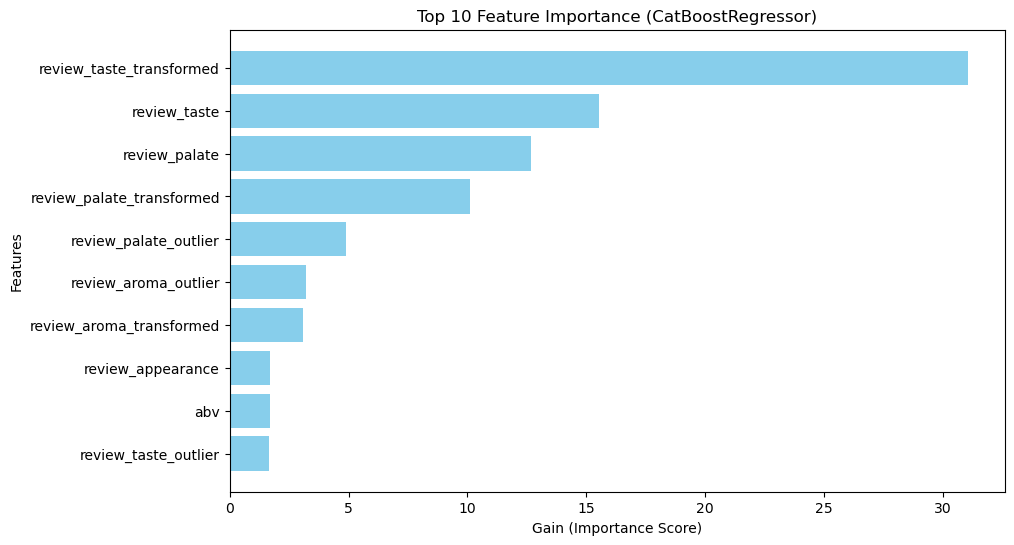

In [33]:
# Building the CatBoost Regressor model
cat_feature_model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=0)
cat_feature_model.fit(X_train, y_train)

# Extract feature importance and select top 10 features
cat_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': cat_feature_model.feature_importances_
})
cat_top_10_features = cat_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (CatBoostRegressor):")
print(cat_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(cat_top_10_features['Feature'], cat_top_10_features['Importance'], color='skyblue')
plt.xlabel("Gain (Importance Score)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (CatBoostRegressor)")
plt.gca().invert_yaxis()
plt.show()

##### Model Training and Evaluation

In [34]:
# Model Name
current_model = "CatBoostRegressor"
current_model_short = "Cat"

# Select top features
best_features = cat_top_10_features['Feature'][0:5]
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Initialize the Gradient Boosting Regressor
cat = CatBoostRegressor()

# Define parameter grid for GridSearch
param_grid = {
    'n_estimators': [10, 100, 300],
    'learning_rate': [0.1, 0.3, 0.6],
    'max_depth': [3, 6],
    'verbose': [0]
}

# Perform Grid Search with Cross-Validation
optimal_cat = GridSearchCV(cat, param_grid, cv=5, scoring='r2', n_jobs=-1)
optimal_cat.fit(X_train_best, y_train)

# Extract best parameters dynamically
best_params = optimal_cat.best_params_
hyperparameters_str = ', '.join([f'{param}={value}' for param, value in best_params.items()])

# Calculate RMSE for training and testing sets
rmse_train = -cross_val_score(optimal_cat, X_train_best, y_train, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_test = -cross_val_score(optimal_cat, X_test_best, y_test, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
rmse_train_mean, rmse_train_std = rmse_train.mean(), rmse_train.std()
rmse_test_mean, rmse_test_std = rmse_test.mean(), rmse_test.std()

# Calculate R-squared for training and testing sets
rsquared_train = cross_val_score(optimal_cat, X_train_best, y_train, cv=10, scoring='r2', n_jobs=-1)
rsquared_test = cross_val_score(optimal_cat, X_test_best, y_test, cv=10, scoring='r2', n_jobs=-1)
rsquared_train_mean, rsquared_train_std = rsquared_train.mean(), rsquared_train.std()
rsquared_test_mean, rsquared_test_std = rsquared_test.mean(), rsquared_test.std()

# Predict on training and testing sets
results_train[current_model_short + "_pred"] = optimal_cat.predict(X_train_best)
results_test[current_model_short + "_pred"] = optimal_cat.predict(X_test_best)

# Create metrics DataFrame
current_metrics = pd.DataFrame({
    'Model': current_model,
    'Hyperparameters': [hyperparameters_str],
    'Test  R\u00b2 (Mean)': [round(rsquared_test_mean, 4)],
    'Test  R\u00b2 (Std Dev)': [round(rsquared_test_std, 4)],
    'Test RMSE (Mean)': [round(rmse_test_mean, 1)],
    'Test RMSE (Std Dev)': [round(rmse_test_std, 3)],
    'Train  R\u00b2 (Mean)': [round(rsquared_train_mean, 4)],
    'Train  R\u00b2 (Std Dev)': [round(rsquared_train_std, 4)],
    'Train RMSE (Mean)': [round(rmse_train_mean, 1)],
    'Train RMSE (Std Dev)': [round(rmse_train_std, 3)],
    'Number of Train Features': [len(best_features)],
    'Train Features': [list(best_features)]
})

# Append metrics to performance DataFrame
performance_df = pd.concat([performance_df, current_metrics])
performance_df.head()

,Model,Hyperparameters,Test R² (Mean),Test R² (Std Dev),Test RMSE (Mean),Test RMSE (Std Dev),Train R² (Mean),Train R² (Std Dev),Train RMSE (Mean),Train RMSE (Std Dev),Number of Train Features,Train Features
0,GradientBoostingRegressor,"alpha=0.9, learning_rate=0.1",0.8629,0.0591,0.1,0.032,0.9088,0.0268,0.1,0.012,5,"[review_taste_transformed, review_taste, revie..."
0,XGBRegressor,"learning_rate=0.1, max_depth=3",0.8450,0.0794,0.2,0.042,0.9139,0.0234,0.1,0.011,5,"[review_taste, review_palate, review_taste_out..."
0,CatBoostRegressor,"learning_rate=0.1, max_depth=3, n_estimators=1...",0.8366,0.0677,0.2,0.035,0.8857,0.0285,0.1,0.011,5,"[review_taste_transformed, review_taste, revie..."


#### Performance Analysis

In [35]:
performance_df.sort_values(by=['Test  R\u00b2 (Mean)'], ascending=False).head()

,Model,Hyperparameters,Test R² (Mean),Test R² (Std Dev),Test RMSE (Mean),Test RMSE (Std Dev),Train R² (Mean),Train R² (Std Dev),Train RMSE (Mean),Train RMSE (Std Dev),Number of Train Features,Train Features
0,GradientBoostingRegressor,"alpha=0.9, learning_rate=0.1",0.8629,0.0591,0.1,0.032,0.9088,0.0268,0.1,0.012,5,"[review_taste_transformed, review_taste, revie..."
0,XGBRegressor,"learning_rate=0.1, max_depth=3",0.8450,0.0794,0.2,0.042,0.9139,0.0234,0.1,0.011,5,"[review_taste, review_palate, review_taste_out..."
0,CatBoostRegressor,"learning_rate=0.1, max_depth=3, n_estimators=1...",0.8366,0.0677,0.2,0.035,0.8857,0.0285,0.1,0.011,5,"[review_taste_transformed, review_taste, revie..."


Based on the performance table, the Gradient Boosting Regressor with alpha=0.9 and learning_rate=0.1 has the best performance, achieving an R² of 86.29%. Therefore, I will use this model to predict the `new_beer` entry.

#### Predicting `review_overall` of the `HopDevil IPA` beer.

In [173]:
new_beer = {
    'Name': 'HopDevil IPA',
    'Style': 'American IPA',
    'Brewery': 'Victory Brewing Company',
    'Beer Name (Full)': 'Victory Brewing Company HopDevil IPA',
    'Description': '''HopDevil IPA is an American IPA crafted by Victory Brewing Company. 
                     This beer boasts a bold hop character with prominent citrus and floral notes, 
                     balanced by a sturdy malt backbone. It pours a hazy amber color with a creamy white head. 
                     With a moderate alcohol content and a refreshing bitterness, 
                     HopDevil IPA is a favorite among hop enthusiasts.''',
    'ABV': 6.7,              
    'Min IBU': None,         
    'Max IBU': None,         
    'Astringency': None,     
    'Body': 55,              
    'Alcohol': None,         
    'Bitter': 70,            
    'Sweet': 20,             
    'Sour': None,            
    'Salty': 0,              
    'Fruits': None,          
    'Hoppy': 80,             
    'Spices': 10,            
    'Malty': None,           
    'review_aroma': 4.4,     
    'review_appearance': 4.3,
    'review_palate': None,   
    'review_taste': 4.6,     
    'review_overall': None, 
    'number_of_reviews': 2500 
}

In [174]:
new_beer_df = pd.DataFrame([new_beer])

# Create function to format the column names
def format_column(col_name):

    # Convert to lower case
    col_name = col_name.lower()

    # Convert anything that is not in A-Z | 0-9 to _
    col_name = re.sub(r'[^a-z0-9]+', '_', col_name).strip("_")

    return col_name

# Apply function
new_beer_df.columns = [format_column(col) for col in new_beer_df.columns]
new_beer_df.head()

,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,HopDevil IPA,American IPA,Victory Brewing Company,Victory Brewing Company HopDevil IPA,HopDevil IPA is an American IPA crafted by Vic...,6.7,None,None,None,55,None,70,20,None,0,None,80,10,None,4.4,4.3,None,4.6,None,2500


#### Filling Null Values

To fill the missing values in the `new_beer` entry, I followed these steps:

1. **Identify Relevant Data for Filling**:
   - Got the columns from the original dataset to use for filling (`fill_df`).

2. **Check for Similar Entries**:
   - Checked if there is an existing entry with the same `style` as the new beer (`American IPA`). No matching records were found.

3. **Calculate Average Values for style**:
   - Dropped non-numeric columns and computed the average values for beers from `IPA - American` (`avg_df`).

4. **Fill Missing Values**:
   - Used the average values from the brewery group to fill in the missing numeric values in `new_beer_df`.

In [175]:
file_name = "beer_profile_and_ratings.csv"
beer_df_clean = pd.read_csv(data_loc + file_name)
beer_df_clean.columns = [format_column(col) for col in beer_df_clean.columns]

In [176]:
numeric_columns = beer_df_clean.select_dtypes(include=['number']).columns
cat_columns = beer_df_clean.select_dtypes(include=['object', 'category']).columns

# Getting Original Dataset
fill_df = beer_df_transf[list(cat_columns) + list(numeric_columns)]

In [177]:
# Checking if there's an American IPA style in the DF (feature of the new dataset)
style_group = fill_df[fill_df['style'].str.contains('IPA - American', case=False, na=False)]

# Getting the avg values for beers from Victory Brewing Company in the DF
avg_df = style_group.drop(columns=["name", "brewery", "beer_name_full", "description"])
avg_df = avg_df.groupby('style').mean().reset_index()
avg_df.head()

,style,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,IPA - American,6.897368,50.0,70.0,19.052632,33.368421,9.5,63.973684,41.394737,50.394737,0.842105,65.973684,94.0,4.815789,45.763158,4.048589,4.032771,3.977594,4.037194,4.078092,901.578947


In [178]:
# Fill null values of the new beer with the average values from above
new_beer_df[numeric_columns] = new_beer_df[numeric_columns].astype("float")
for col in new_beer_df[numeric_columns].columns:
    new_beer_df[col] = np.where(new_beer_df[col].isna(), avg_df[col][0], new_beer_df[col])

new_beer_df.head()

,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,HopDevil IPA,American IPA,Victory Brewing Company,Victory Brewing Company HopDevil IPA,HopDevil IPA is an American IPA crafted by Vic...,6.7,50.0,70.0,19.052632,55.0,9.5,70.0,20.0,50.394737,0.0,65.973684,80.0,10.0,45.763158,4.4,4.3,3.977594,4.6,4.078092,2500.0


##### Add style_main and style_sub

In [179]:
new_beer_df['style_main'] = "IPA"
new_beer_df['style_sub'] = "American"
new_beer_df.head()

,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,style_main,style_sub
0,HopDevil IPA,American IPA,Victory Brewing Company,Victory Brewing Company HopDevil IPA,HopDevil IPA is an American IPA crafted by Vic...,6.7,50.0,70.0,19.052632,55.0,9.5,70.0,20.0,50.394737,0.0,65.973684,80.0,10.0,45.763158,4.4,4.3,3.977594,4.6,4.078092,2500.0,IPA,American


#### Applying feature transformations

In [180]:
cat_columns = new_beer_df.select_dtypes(include=['object', 'category']).columns


# Update LabelEncoder with new labels if they are not already present
for feature in cat_columns:
    if feature in new_beer_df.columns:
        # Get the current classes of the encoder
        current_classes = label_encoders[feature].classes_
        
        # Find new classes that are not in the current classes
        new_classes = new_beer_df[feature][~new_beer_df[feature].isin(current_classes)].unique()
        
        # Update the classes if there are new ones
        if len(new_classes) > 0:
            # Append new classes to the existing classes
            updated_classes = np.append(current_classes, new_classes)
            label_encoders[feature].classes_ = updated_classes

        # Transform the data using the updated encoder
        new_beer_df[f'{feature}_label_encoded'] = label_encoders[feature].transform(new_beer_df[feature])

new_beer_df.head()

,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,style_main,style_sub,name_label_encoded,style_label_encoded,brewery_label_encoded,beer_name_full_label_encoded,description_label_encoded,style_main_label_encoded,style_sub_label_encoded
0,HopDevil IPA,American IPA,Victory Brewing Company,Victory Brewing Company HopDevil IPA,HopDevil IPA is an American IPA crafted by Vic...,6.7,50.0,70.0,19.052632,55.0,9.5,70.0,20.0,50.394737,0.0,65.973684,80.0,10.0,45.763158,4.4,4.3,3.977594,4.6,4.078092,2500.0,IPA,American,3067,112,894,3198,1842,18,1


In [181]:
# Detecting outliers
new_beer_df[numeric_columns] = new_beer_df[numeric_columns].astype("float")
for feature in numeric_columns:
    new_beer_df[f'{feature}_outlier'] = ((new_beer_df[feature] < lower_limit.loc[feature]) | (new_beer_df[feature] > upper_limit.loc[feature])).astype(int)

# Applying numeric transfomations
for col in numeric_columns:
    new_beer_df[col + "_transformed"] = np.log1p(new_beer_df[col])
    new_beer_df[col + "_transformed"] = np.cbrt(new_beer_df[col + "_transformed"])

new_beer_df


,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,style_main,style_sub,name_label_encoded,style_label_encoded,brewery_label_encoded,beer_name_full_label_encoded,description_label_encoded,style_main_label_encoded,style_sub_label_encoded,abv_outlier,min_ibu_outlier,max_ibu_outlier,astringency_outlier,body_outlier,alcohol_outlier,bitter_outlier,sweet_outlier,sour_outlier,salty_outlier,fruits_outlier,hoppy_outlier,spices_outlier,malty_outlier,review_aroma_outlier,review_appearance_outlier,review_palate_outlier,review_taste_outlier,review_overall_outlier,number_of_reviews_outlier,abv_transformed,min_ibu_transformed,max_ibu_transformed,astringency_transformed,body_transformed,alcohol_transformed,bitter_transformed,sweet_transformed,sour_transformed,salty_transformed,fruits_transformed,hoppy_transformed,spices_transformed,malty_transformed,review_aroma_transformed,review_appearance_transformed,review_palate_transformed,review_taste_transformed,review_overall_transformed,number_of_reviews_transformed
0,HopDevil IPA,American IPA,Victory Brewing Company,Victory Brewing Company HopDevil IPA,HopDevil IPA is an American IPA crafted by Vic...,6.7,50.0,70.0,19.052632,55.0,9.5,70.0,20.0,50.394737,0.0,65.973684,80.0,10.0,45.763158,4.4,4.3,3.977594,4.6,4.078092,2500.0,IPA,American,3067,112,894,3198,1842,18,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.268518,1.578331,1.621415,1.441987,1.590748,1.329762,1.621415,1.449349,1.579362,0.0,1.613979,1.637953,1.338474,1.566639,1.190292,1.185878,1.170811,1.198787,1.175652,1.985262


#### Make prediction using the selected features by the GBR model.

In [182]:
# selected feature list
gbr_features = performance_df[performance_df['Model'] == 'GradientBoostingRegressor']['Train Features'][0]

# Select inference data
new_beer_df_gb = new_beer_df[gbr_features]

# Compute prediction
pred = optimal_gbr.predict(new_beer_df_gb)
new_beer_df['review_overall_pred'] = pred

# Display results
print("Input Features: ", gbr_features)
print("Prediction: ", round(pred[0], 3))
new_beer_df.head()

KeyError: 0

### Problem 3. (25 points)
Using your best cross-validated classification model, selected from the pool of trained models(you determine how many and which models to optimize your evaluation metrics), report critical performance metrics such as accuracy and F1-score on both the training and test sets. Once the model demonstrates strong performance, apply it to predict the beer style for a new beer, "HopDevil IPA," using the provided data to check whether it correctly predicts 'American IPA.' Note that the Style column contains 111 unique labels. What potential issues could arise in the prediction model?

## Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import warnings
import matplotlib.pyplot as plt
import re

# Data prep for modeling
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler


# Modeling
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
# from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, plot_importance
from catboost import CatBoostRegressor

# Additional Config
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Import Transformed DF

In [9]:
# Data location
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/"
file_name = "beer_profile_and_ratings_trasformed.csv"

# Import DF
beer_df_transf = pd.read_csv(data_loc + file_name)
beer_df_transf.head()

,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,abv_outlier,min_ibu_outlier,max_ibu_outlier,astringency_outlier,body_outlier,alcohol_outlier,bitter_outlier,sweet_outlier,sour_outlier,salty_outlier,fruits_outlier,hoppy_outlier,spices_outlier,malty_outlier,review_aroma_outlier,review_appearance_outlier,review_palate_outlier,review_taste_outlier,review_overall_outlier,number_of_reviews_outlier,abv_transformed,min_ibu_transformed,max_ibu_transformed,astringency_transformed,body_transformed,alcohol_transformed,bitter_transformed,sweet_transformed,sour_transformed,salty_transformed,fruits_transformed,hoppy_transformed,spices_transformed,malty_transformed,review_aroma_transformed,review_appearance_transformed,review_palate_transformed,review_taste_transformed,review_overall_transformed,number_of_reviews_transformed,style_main,style_sub,name_label_encoded,style_label_encoded,brewery_label_encoded,beer_name_full_label_encoded,description_label_encoded,style_main_label_encoded,style_sub_label_encoded
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.225507,1.482477,1.578331,1.381920,1.517789,1.320500,1.570177,1.628335,1.522097,0.000000,1.522097,1.595357,1.300044,1.677263,1.145694,1.153306,1.148901,1.153686,1.164314,1.838137,Altbier,NaN,109,0,13,39,1364,0,63
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.368862,1.595357,1.433290,1.522097,1.590748,1.415011,0.000000,1.476504,1.530276,1.368862,1.643920,1.161824,1.164267,1.167196,1.173109,1.173559,1.834910,Altbier,NaN,784,0,560,1927,1659,0,63
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.214581,1.482477,1.578331,1.393859,1.537934,1.248459,1.555161,1.558324,1.354472,0.000000,1.338474,1.588371,1.171902,1.606114,1.140587,1.154935,1.151348,1.153007,1.163458,1.810524,Altbier,NaN,1627,0,560,1930,1061,0,63
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.310621,1.482477,1.578331,1.381920,1.590748,1.513324,1.570177,1.666108,1.433290,0.884997,1.575677,1.548569,1.415011,1.685399,1.178945,1.173543,1.179071,1.181582,1.172166,1.808070,Altbier,NaN,773,0,879,3018,0,0,63
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.482477,1.580925,1.488179,1.561402,1.564402,1.320500,0.884997,1.354472,1.580925,1.449349,1.658796,1.152666,1.170633,1.158500,1.160132,1.162818,1.660050,Altbier,NaN,2506,0,643,2189,579,0,63


In [10]:
# Drop the categorical columns
cat_columns = beer_df_transf.select_dtypes(include=['object', 'category']).columns
beer_df_numeric = beer_df_transf.copy()
beer_df_numeric.drop(columns=cat_columns, inplace=True)
beer_df_numeric.head()

,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,abv_outlier,min_ibu_outlier,max_ibu_outlier,astringency_outlier,body_outlier,alcohol_outlier,bitter_outlier,sweet_outlier,sour_outlier,salty_outlier,fruits_outlier,hoppy_outlier,spices_outlier,malty_outlier,review_aroma_outlier,review_appearance_outlier,review_palate_outlier,review_taste_outlier,review_overall_outlier,number_of_reviews_outlier,abv_transformed,min_ibu_transformed,max_ibu_transformed,astringency_transformed,body_transformed,alcohol_transformed,bitter_transformed,sweet_transformed,sour_transformed,salty_transformed,fruits_transformed,hoppy_transformed,spices_transformed,malty_transformed,review_aroma_transformed,review_appearance_transformed,review_palate_transformed,review_taste_transformed,review_overall_transformed,number_of_reviews_transformed,name_label_encoded,style_label_encoded,brewery_label_encoded,beer_name_full_label_encoded,description_label_encoded,style_main_label_encoded,style_sub_label_encoded
0,5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.225507,1.482477,1.578331,1.381920,1.517789,1.320500,1.570177,1.628335,1.522097,0.000000,1.522097,1.595357,1.300044,1.677263,1.145694,1.153306,1.148901,1.153686,1.164314,1.838137,109,0,13,39,1364,0,63
1,7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.368862,1.595357,1.433290,1.522097,1.590748,1.415011,0.000000,1.476504,1.530276,1.368862,1.643920,1.161824,1.164267,1.167196,1.173109,1.173559,1.834910,784,0,560,1927,1659,0,63
2,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.214581,1.482477,1.578331,1.393859,1.537934,1.248459,1.555161,1.558324,1.354472,0.000000,1.338474,1.588371,1.171902,1.606114,1.140587,1.154935,1.151348,1.153007,1.163458,1.810524,1627,0,560,1930,1061,0,63
3,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.310621,1.482477,1.578331,1.381920,1.590748,1.513324,1.570177,1.666108,1.433290,0.884997,1.575677,1.548569,1.415011,1.685399,1.178945,1.173543,1.179071,1.181582,1.172166,1.808070,773,0,879,3018,0,0,63
4,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.281419,1.482477,1.578331,1.482477,1.580925,1.488179,1.561402,1.564402,1.320500,0.884997,1.354472,1.580925,1.449349,1.658796,1.152666,1.170633,1.158500,1.160132,1.162818,1.660050,2506,0,643,2189,579,0,63


## Splitting the data into train and test

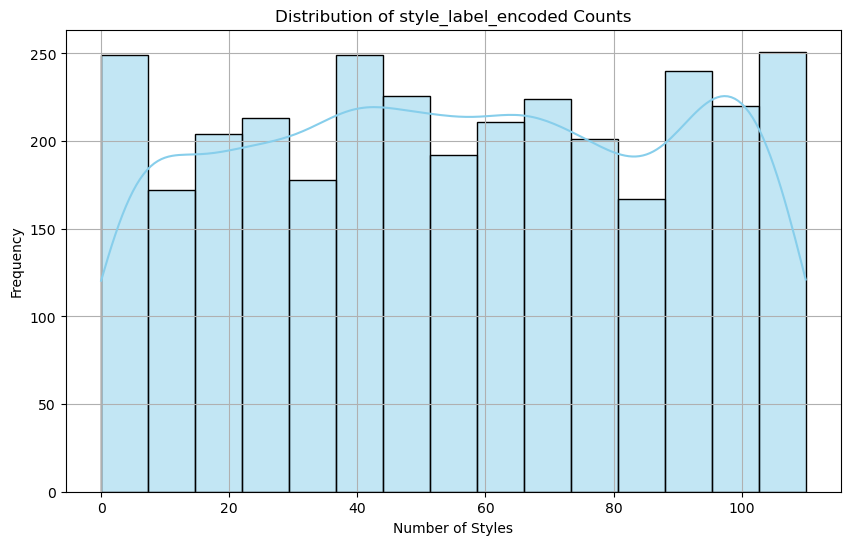

In [12]:
# Visualize the distribution of passenger counts
plt.figure(figsize=(10, 6))
sns.histplot(beer_df_numeric['style_label_encoded'], kde=True, color='skyblue')
plt.title('Distribution of style_label_encoded Counts')
plt.xlabel('Number of Styles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

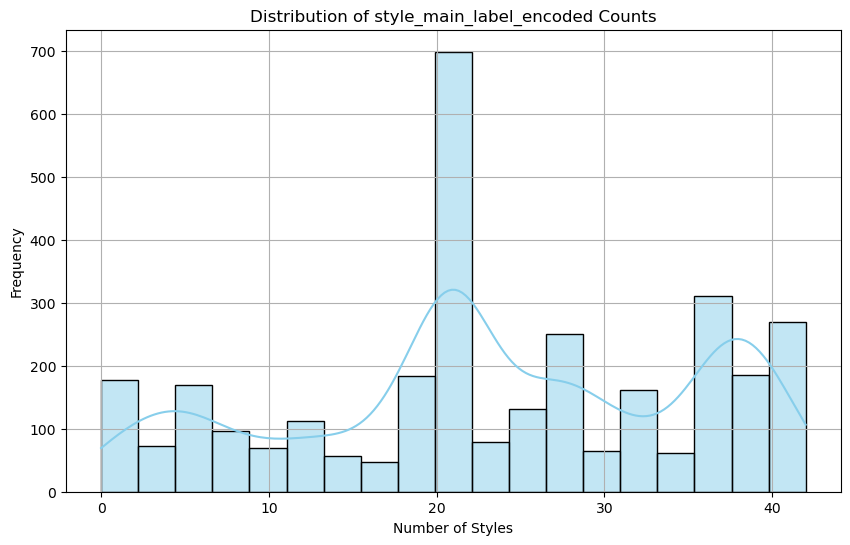

In [13]:
# Visualize the distribution of passenger counts
plt.figure(figsize=(10, 6))
sns.histplot(beer_df_numeric['style_main_label_encoded'], kde=True, color='skyblue')
plt.title('Distribution of style_main_label_encoded Counts')
plt.xlabel('Number of Styles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### Reduction of Styles and Its Impact 
Initially, the Style column contained 111 unique labels, making the classification task highly complex and hard for the model to learn effective boundaries; class imbalance, leading to bias towards common styles; and increased risk of overfitting, especially for rare styles.

To reduce this complexity, we split the `Style` column into `style_main` and `style_sub` by splitting on the `'-'` character. This resulted in 43 unique main styles. For example, 'IPA - American' was split into style_main = 'IPA' and style_sub = 'American'. 

This reduction significantly decreased the computational complexity of the classification task by grouping similar styles under broader categories. It simplified the model's focus to distinguishing broader styles rather than granular subcategories, reducing the risk of overfitting and improving generalization.

In [156]:
# Predictor Features
X = beer_df_numeric.drop(columns=['style_main_label_encoded', 'style_sub_label_encoded', 'style_label_encoded'])

# target feature
y = beer_df_numeric['style_main_label_encoded']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

print(f'Training set dimensions: {X_train.shape}, {y_train.shape}')
print(f'Testing set dimensions: {X_test.shape}, {y_test.shape}')
print("Unique labels in y_train:", (y_train.nunique()))
print("Unique labels in y_test:", (y_test.nunique()))

Training set dimensions: (2557, 64), (2557,)
Testing set dimensions: (640, 64), (640,)
Unique labels in y_train: 43
Unique labels in y_test: 42


In [157]:
# Identify classes present in y_test but missing in y_train
missing_classes = set(y_train.unique()) - set(y_test.unique())

# Filter out these classes from X_train and y_train
train_filter = ~y_train.isin(missing_classes)
X_train = X_train[train_filter]
y_train = y_train[train_filter]


In [158]:
print(f'Training set dimensions: {X_train.shape}, {y_train.shape}')
print(f'Testing set dimensions: {X_test.shape}, {y_test.shape}')
print("Unique labels in y_train:", (y_train.nunique()))
print("Unique labels in y_test:", (y_test.nunique()))

Training set dimensions: (2554, 64), (2554,)
Testing set dimensions: (640, 64), (640,)
Unique labels in y_train: 42
Unique labels in y_test: 42


### Modeling
* *Models to be considered:* 
    - AdaBoost Classifier
    - XGBoost Classifier
    - CatBoost Classifier

#### Create Dataset to store results

In [159]:
# Performance
performance_df=pd.DataFrame()

# Predictions
results_train = pd.DataFrame({'True Results': y_train})
results_test = pd.DataFrame({'True Results': y_test})

#### LGBM Classifier
##### Feature Selection

In [18]:
# pip install --upgrade pandas "dask[complete]"
import lightgbm as lgb
from lightgbm import LGBMClassifier

Top 10 Features by Importance (LightGBM Classifier):
             Feature  Importance
0            min_ibu    0.472827
1            max_ibu    0.466758
2               body    0.051318
3                abv    0.046959
4              hoppy    0.040264
5               sour    0.038789
6             spices    0.032681
7            alcohol    0.012386
8  number_of_reviews    0.010363
9             fruits    0.007648


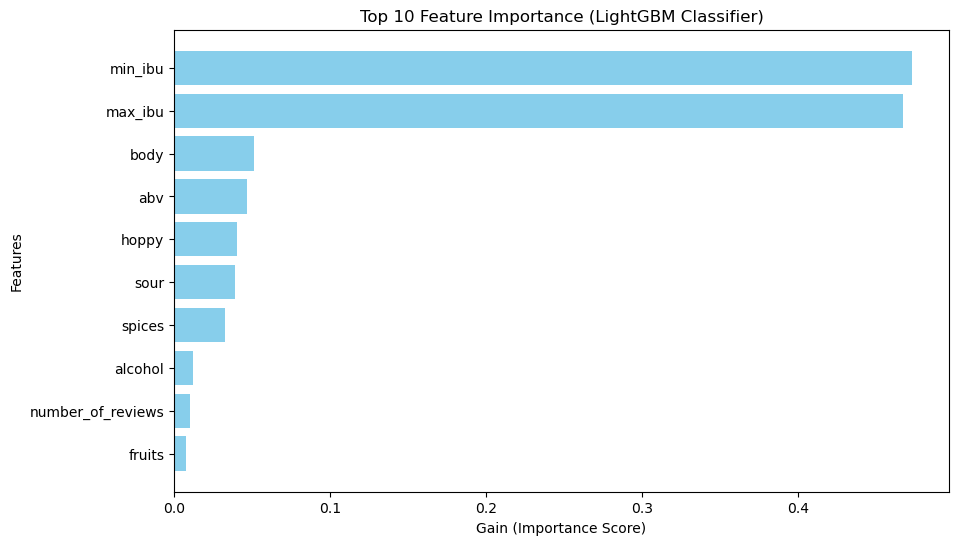

In [21]:
# Building the LightGBMClassifier model
lgbm_feature_model = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
lgbm_feature_model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(lgbm_feature_model, X_train, y_train, n_repeats=30, random_state=42)

# Create a DataFrame to store feature importances
lgbm_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance and select top 10
lgbm_top_10_features = lgbm_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (LightGBM Classifier):")
print(lgbm_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(lgbm_top_10_features['Feature'], lgbm_top_10_features['Importance'], color='skyblue')
plt.xlabel("Gain (Importance Score)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (LightGBM Classifier)")
plt.gca().invert_yaxis()
plt.show()


In [22]:
# Model Name
current_model = "LGBMClassifier"
current_model_short = "LGBM"

# Select top features
best_features = lgbm_top_10_features['Feature'][0:6]
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Initialize the LGBMClassifier
lgbm = LGBMClassifier()

# Define parameter grid for GridSearch
param_grid = {
    'n_estimators': [10, 100],
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 6],
    'verbose': [-1]
}

# Perform Grid Search with Cross-Validation
optimal_lgbm = GridSearchCV(lgbm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
optimal_lgbm.fit(X_train_best, y_train)

# Extract best parameters dynamically
best_params = optimal_lgbm.best_params_
hyperparameters_str = ', '.join([f'{param}={value}' for param, value in best_params.items()])

# Calculate Accuracy for training and testing sets
accuracy_train = cross_val_score(optimal_lgbm, X_train_best, y_train, cv=3, scoring='accuracy')
accuracy_test = cross_val_score(optimal_lgbm, X_test_best, y_test, cv=3, scoring='accuracy')
accuracy_train_mean, accuracy_train_std = accuracy_train.mean(), accuracy_train.std()
accuracy_test_mean, accuracy_test_std = accuracy_test.mean(), accuracy_test.std()

# Calculate F1-Score for training and testing sets
f1_train = cross_val_score(optimal_lgbm, X_train_best, y_train, cv=3, scoring='f1_weighted')
f1_test = cross_val_score(optimal_lgbm, X_test_best, y_test, cv=3, scoring='f1_weighted')
f1_train_mean, f1_train_std = f1_train.mean(), f1_train.std()
f1_test_mean, f1_test_std = f1_test.mean(), f1_test.std()

# Predict on training and testing sets
results_train[current_model_short + "_pred"] = optimal_lgbm.predict(X_train_best)
results_test[current_model_short + "_pred"] = optimal_lgbm.predict(X_test_best)

# Create metrics DataFrame
current_metrics = pd.DataFrame({
    'Model': current_model,
    'Hyperparameters': [hyperparameters_str],
    'Test Accuracy (Mean)': [round(accuracy_test_mean, 4)],
    'Test Accuracy (Std Dev)': [round(accuracy_test_std, 4)],
    'Test F1-Score (Mean)': [round(f1_test_mean, 4)],
    'Test F1-Score (Std Dev)': [round(f1_test_std, 4)],
    'Train Accuracy (Mean)': [round(accuracy_train_mean, 4)],
    'Train Accuracy (Std Dev)': [round(accuracy_train_std, 4)],
    'Train F1-Score (Mean)': [round(f1_train_mean, 4)],
    'Train F1-Score (Std Dev)': [round(f1_train_std, 4)],
    'Number of Train Features': [len(best_features)],
    'Train Features': [list(best_features)]
})

# Append metrics to performance DataFrame
performance_df = pd.concat([performance_df, current_metrics], ignore_index=True)
performance_df.head()


,Model,Hyperparameters,Test Accuracy (Mean),Test Accuracy (Std Dev),Test F1-Score (Mean),Test F1-Score (Std Dev),Train Accuracy (Mean),Train Accuracy (Std Dev),Train F1-Score (Mean),Train F1-Score (Std Dev),Number of Train Features,Train Features
0,LGBMClassifier,"learning_rate=0.1, max_depth=3, n_estimators=1...",0.2768,0.2929,0.2472,0.2979,0.8312,0.0024,0.8256,0.0037,6,"[min_ibu, max_ibu, body, abv, hoppy, sour]"


#### CatBoost Classifier
##### Feature Selection

Top 10 Features by Importance (CatBoost Classifier):
               Feature  Importance
0              max_ibu    0.366393
1              min_ibu    0.129601
2   fruits_transformed    0.125685
3     body_transformed    0.090877
4  min_ibu_transformed    0.061577
5          astringency    0.044035
6      abv_transformed    0.030501
7    hoppy_transformed    0.017228
8                  abv    0.017228
9                malty    0.015975


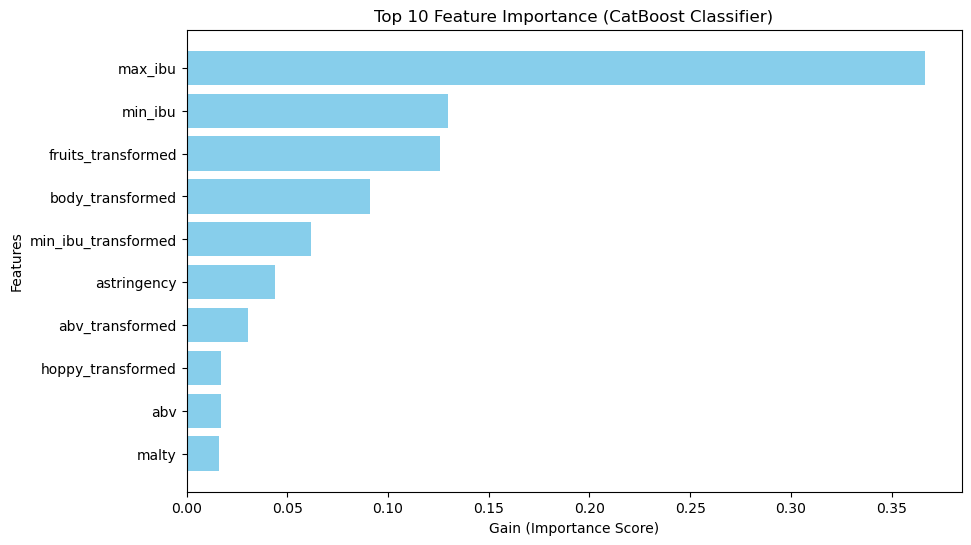

In [160]:
from catboost import CatBoostClassifier
# Building the CatBoostClassifier model
cat_feature_model = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cat_feature_model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(cat_feature_model, X_train, y_train, n_repeats=30, random_state=42)

# Create a DataFrame to store feature importances
cat_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance and select top 10
cat_top_10_features = cat_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (CatBoost Classifier):")
print(cat_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(cat_top_10_features['Feature'], cat_top_10_features['Importance'], color='skyblue')
plt.xlabel("Gain (Importance Score)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (CatBoost Classifier)")
plt.gca().invert_yaxis()
plt.show()

##### Model Training and Evaluation

In [161]:
# Model Name
current_model = "CatBoostClassifier"
current_model_short = "Cat"

# Select top features
best_features = cat_top_10_features['Feature'][0:6]
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Initialize the CatBoostClassifier
cat = CatBoostClassifier()

# Define parameter grid for GridSearch
param_grid = {
    'n_estimators': [10, 100],
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 6],
    'verbose': [0]
}

# Perform Grid Search with Cross-Validation
optimal_cat = GridSearchCV(cat, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
optimal_cat.fit(X_train_best, y_train)

# Extract best parameters dynamically
best_params = optimal_cat.best_params_
hyperparameters_str = ', '.join([f'{param}={value}' for param, value in best_params.items()])

# Calculate Accuracy for training and testing sets
accuracy_train = cross_val_score(optimal_cat, X_train_best, y_train, cv=3, scoring='accuracy')
accuracy_test = cross_val_score(optimal_cat, X_test_best, y_test, cv=3, scoring='accuracy')
accuracy_train_mean, accuracy_train_std = accuracy_train.mean(), accuracy_train.std()
accuracy_test_mean, accuracy_test_std = accuracy_test.mean(), accuracy_test.std()

# Calculate F1-Score for training and testing sets
f1_train = cross_val_score(optimal_cat, X_train_best, y_train, cv=3, scoring='f1_weighted')
f1_test = cross_val_score(optimal_cat, X_test_best, y_test, cv=3, scoring='f1_weighted')
f1_train_mean, f1_train_std = f1_train.mean(), f1_train.std()
f1_test_mean, f1_test_std = f1_test.mean(), f1_test.std()

# Predict on training and testing sets
results_train[current_model_short + "_pred"] = optimal_cat.predict(X_train_best)
results_test[current_model_short + "_pred"] = optimal_cat.predict(X_test_best)

# Create metrics DataFrame
current_metrics = pd.DataFrame({
    'Model': current_model,
    'Hyperparameters': [hyperparameters_str],
    'Test Accuracy (Mean)': [round(accuracy_test_mean, 4)],
    'Test Accuracy (Std Dev)': [round(accuracy_test_std, 4)],
    'Test F1-Score (Mean)': [round(f1_test_mean, 4)],
    'Test F1-Score (Std Dev)': [round(f1_test_std, 4)],
    'Train Accuracy (Mean)': [round(accuracy_train_mean, 4)],
    'Train Accuracy (Std Dev)': [round(accuracy_train_std, 4)],
    'Train F1-Score (Mean)': [round(f1_train_mean, 4)],
    'Train F1-Score (Std Dev)': [round(f1_train_std, 4)],
    'Number of Train Features': [len(best_features)],
    'Train Features': [list(best_features)]
})

# Append metrics to performance DataFrame
performance_df = pd.concat([performance_df, current_metrics], ignore_index=True)
performance_df.head()


,Model,Hyperparameters,Test Accuracy (Mean),Test Accuracy (Std Dev),Test F1-Score (Mean),Test F1-Score (Std Dev),Train Accuracy (Mean),Train Accuracy (Std Dev),Train F1-Score (Mean),Train F1-Score (Std Dev),Number of Train Features,Train Features
0,CatBoostClassifier,"learning_rate=0.3, max_depth=3, n_estimators=1...",0.625,0.0109,0.5991,0.0061,0.7525,0.0043,0.7438,0.0075,6,"[max_ibu, min_ibu, fruits_transformed, body_tr..."


#### AdaBoost Classifier
##### Feature Selection

Top 10 Features by Importance (AdaBoostClassifier):
                     Feature  Importance
0        max_ibu_transformed    0.019525
1                    max_ibu    0.019525
2                        abv    0.017319
3            abv_transformed    0.017319
4   review_aroma_transformed    0.003485
5      review_palate_outlier    0.000000
6       review_taste_outlier    0.000000
7     review_overall_outlier    0.000000
8  number_of_reviews_outlier    0.000000
9           sour_transformed    0.000000


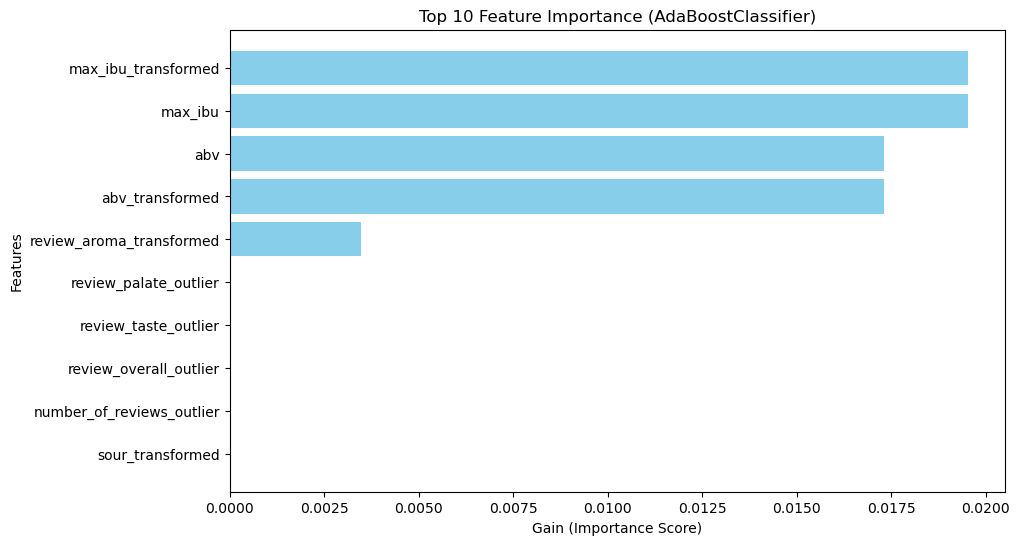

In [25]:
from sklearn.ensemble import AdaBoostClassifier
# Building the AdaBoostClassifier model
ada_feature_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_feature_model.fit(X_train, y_train)

perm_importance = permutation_importance(ada_feature_model, X_train, y_train, n_repeats=30, random_state=42)

# Create a DataFrame to store feature importances
ada_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance and select top 10
ada_top_10_features = ada_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (AdaBoostClassifier):")
print(ada_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(ada_top_10_features['Feature'], ada_top_10_features['Importance'], color='skyblue')
plt.xlabel("Gain (Importance Score)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (AdaBoostClassifier)")
plt.gca().invert_yaxis()
plt.show()

##### Model Training and Evaluation

In [26]:
# Model Name
current_model = "AdaBoostClassifier"
current_model_short = "Ada"

# Select top features
best_features = ada_top_10_features['Feature'][0:4]
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Initialize the AdaBoostClassifier
ada = AdaBoostClassifier()

# Define parameter grid for GridSearch
param_grid = {
    'n_estimators': [10, 100, 300],
    'learning_rate': [0.1, 0.3, 0.6]
}

# Perform Grid Search with Cross-Validation
optimal_ada = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
optimal_ada.fit(X_train_best, y_train)

# Extract best parameters dynamically
best_params = optimal_ada.best_params_
hyperparameters_str = ', '.join([f'{param}={value}' for param, value in best_params.items()])

# Calculate Accuracy for training and testing sets
accuracy_train = cross_val_score(optimal_ada, X_train_best, y_train, cv=3, scoring='accuracy')
accuracy_test = cross_val_score(optimal_ada, X_test_best, y_test, cv=3, scoring='accuracy')
accuracy_train_mean, accuracy_train_std = accuracy_train.mean(), accuracy_train.std()
accuracy_test_mean, accuracy_test_std = accuracy_test.mean(), accuracy_test.std()

# Calculate F1-Score for training and testing sets
f1_train = cross_val_score(optimal_ada, X_train_best, y_train, cv=3, scoring='f1_weighted')
f1_test = cross_val_score(optimal_ada, X_test_best, y_test, cv=3, scoring='f1_weighted')
f1_train_mean, f1_train_std = f1_train.mean(), f1_train.std()
f1_test_mean, f1_test_std = f1_test.mean(), f1_test.std()

# Predict on training and testing sets
results_train[current_model_short + "_pred"] = optimal_ada.predict(X_train_best)
results_test[current_model_short + "_pred"] = optimal_ada.predict(X_test_best)

# Create metrics DataFrame
current_metrics = pd.DataFrame({
    'Model': current_model,
    'Hyperparameters': [hyperparameters_str],
    'Test Accuracy (Mean)': [round(accuracy_test_mean, 4)],
    'Test Accuracy (Std Dev)': [round(accuracy_test_std, 4)],
    'Test F1-Score (Mean)': [round(f1_test_mean, 4)],
    'Test F1-Score (Std Dev)': [round(f1_test_std, 4)],
    'Train Accuracy (Mean)': [round(accuracy_train_mean, 4)],
    'Train Accuracy (Std Dev)': [round(accuracy_train_std, 4)],
    'Train F1-Score (Mean)': [round(f1_train_mean, 4)],
    'Train F1-Score (Std Dev)': [round(f1_train_std, 4)],
    'Number of Train Features': [len(best_features)],
    'Train Features': [list(best_features)]
})

# Append metrics to performance DataFrame
performance_df = pd.concat([performance_df, current_metrics], ignore_index=True)
performance_df.head()

,Model,Hyperparameters,Test Accuracy (Mean),Test Accuracy (Std Dev),Test F1-Score (Mean),Test F1-Score (Std Dev),Train Accuracy (Mean),Train Accuracy (Std Dev),Train F1-Score (Mean),Train F1-Score (Std Dev),Number of Train Features,Train Features
0,LGBMClassifier,"learning_rate=0.1, max_depth=3, n_estimators=1...",0.2768,0.2929,0.2472,0.2979,0.8312,0.0024,0.8256,0.0037,6,"[min_ibu, max_ibu, body, abv, hoppy, sour]"
1,CatBoostlassifier,"learning_rate=0.3, max_depth=3, n_estimators=1...",0.6250,0.0109,0.5991,0.0061,0.7525,0.0043,0.7438,0.0075,6,"[max_ibu, min_ibu, fruits_transformed, body_tr..."
2,AdaBoostClassifier,"learning_rate=0.3, n_estimators=10",0.2328,0.0249,0.1350,0.0111,0.2455,0.0054,0.1485,0.0212,4,"[max_ibu_transformed, max_ibu, abv, abv_transf..."


Based on the performance table, the CatBoostClassifier has the best performance, achieving an accuracy of 62.5%. Therefore, I will use this model to predict the `new_beer` entry.

In [154]:
new_beer_df

,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,style_main,style_sub,name_label_encoded,style_label_encoded,brewery_label_encoded,beer_name_full_label_encoded,description_label_encoded,style_main_label_encoded,style_sub_label_encoded,abv_outlier,min_ibu_outlier,max_ibu_outlier,astringency_outlier,body_outlier,alcohol_outlier,bitter_outlier,sweet_outlier,sour_outlier,salty_outlier,fruits_outlier,hoppy_outlier,spices_outlier,malty_outlier,review_aroma_outlier,review_appearance_outlier,review_palate_outlier,review_taste_outlier,review_overall_outlier,number_of_reviews_outlier,abv_transformed,min_ibu_transformed,max_ibu_transformed,astringency_transformed,body_transformed,alcohol_transformed,bitter_transformed,sweet_transformed,sour_transformed,salty_transformed,fruits_transformed,hoppy_transformed,spices_transformed,malty_transformed,review_aroma_transformed,review_appearance_transformed,review_palate_transformed,review_taste_transformed,review_overall_transformed,number_of_reviews_transformed,review_overall_pred
0,HopDevil IPA,American IPA,Victory Brewing Company,Victory Brewing Company HopDevil IPA,HopDevil IPA is an American IPA crafted by Vic...,6.7,50.0,70.0,19.052632,55.0,9.5,70.0,20.0,50.394737,0.0,65.973684,80.0,10.0,45.763158,4.4,4.3,3.977594,4.6,4.078092,2500.0,IPA,American,3067,112,894,3198,1842,18,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.268518,1.578331,1.621415,1.441987,1.590748,1.329762,1.621415,1.449349,1.579362,0.0,1.613979,1.637953,1.338474,1.566639,1.190292,1.185878,1.170811,1.198787,1.175652,1.985262,4.367272


#### Make prediction using the selected features by the GBR model.

In [163]:
performance_df

,Model,Hyperparameters,Test Accuracy (Mean),Test Accuracy (Std Dev),Test F1-Score (Mean),Test F1-Score (Std Dev),Train Accuracy (Mean),Train Accuracy (Std Dev),Train F1-Score (Mean),Train F1-Score (Std Dev),Number of Train Features,Train Features
0,CatBoostClassifier,"learning_rate=0.3, max_depth=3, n_estimators=1...",0.625,0.0109,0.5991,0.0061,0.7525,0.0043,0.7438,0.0075,6,"[max_ibu, min_ibu, fruits_transformed, body_tr..."


In [171]:
# selected feature list
cat_features = performance_df[performance_df['Model'] == 'CatBoostClassifier']['Train Features'][0]

# Select inference data
new_beer_df_cat = new_beer_df[cat_features]

# Compute prediction
pred = optimal_cat.predict(new_beer_df_cat)
new_beer_df['style_main_label_encoded'] = new_beer_df['style_main_label_encoded_true']
new_beer_df['style_main_pred'] = pred

# Display results
print("Input Features: ", cat_features)
print("Prediction: ", pred[0])
new_beer_df.head()

Input Features:  ['max_ibu', 'min_ibu', 'fruits_transformed', 'body_transformed', 'min_ibu_transformed', 'astringency']
Prediction:  [18]


,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,style_main,style_sub,name_label_encoded,style_label_encoded,brewery_label_encoded,beer_name_full_label_encoded,description_label_encoded,style_main_label_encoded,style_sub_label_encoded,abv_outlier,min_ibu_outlier,max_ibu_outlier,astringency_outlier,body_outlier,alcohol_outlier,bitter_outlier,sweet_outlier,sour_outlier,salty_outlier,fruits_outlier,hoppy_outlier,spices_outlier,malty_outlier,review_aroma_outlier,review_appearance_outlier,review_palate_outlier,review_taste_outlier,review_overall_outlier,number_of_reviews_outlier,abv_transformed,min_ibu_transformed,max_ibu_transformed,astringency_transformed,body_transformed,alcohol_transformed,bitter_transformed,sweet_transformed,sour_transformed,salty_transformed,fruits_transformed,hoppy_transformed,spices_transformed,malty_transformed,review_aroma_transformed,review_appearance_transformed,review_palate_transformed,review_taste_transformed,review_overall_transformed,number_of_reviews_transformed,review_overall_pred,style_main_pred,style_main_label_encoded_true
0,HopDevil IPA,American IPA,Victory Brewing Company,Victory Brewing Company HopDevil IPA,HopDevil IPA is an American IPA crafted by Vic...,6.7,50.0,70.0,19.052632,55.0,9.5,70.0,20.0,50.394737,0.0,65.973684,80.0,10.0,45.763158,4.4,4.3,3.977594,4.6,4.078092,2500.0,IPA,American,3067,112,894,3198,1842,18,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.268518,1.578331,1.621415,1.441987,1.590748,1.329762,1.621415,1.449349,1.579362,0.0,1.613979,1.637953,1.338474,1.566639,1.190292,1.185878,1.170811,1.198787,1.175652,1.985262,4.367272,18,18


In [172]:
# Inverse transform the encoded labels back to the original categories
new_beer_df['style_main_pred'] = label_encoders['style_main'].inverse_transform(new_beer_df['style_main_label_encoded'])
new_beer_df.head()

,name,style,brewery,beer_name_full,description,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,style_main,style_sub,name_label_encoded,style_label_encoded,brewery_label_encoded,beer_name_full_label_encoded,description_label_encoded,style_main_label_encoded,style_sub_label_encoded,abv_outlier,min_ibu_outlier,max_ibu_outlier,astringency_outlier,body_outlier,alcohol_outlier,bitter_outlier,sweet_outlier,sour_outlier,salty_outlier,fruits_outlier,hoppy_outlier,spices_outlier,malty_outlier,review_aroma_outlier,review_appearance_outlier,review_palate_outlier,review_taste_outlier,review_overall_outlier,number_of_reviews_outlier,abv_transformed,min_ibu_transformed,max_ibu_transformed,astringency_transformed,body_transformed,alcohol_transformed,bitter_transformed,sweet_transformed,sour_transformed,salty_transformed,fruits_transformed,hoppy_transformed,spices_transformed,malty_transformed,review_aroma_transformed,review_appearance_transformed,review_palate_transformed,review_taste_transformed,review_overall_transformed,number_of_reviews_transformed,review_overall_pred,style_main_pred,style_main_label_encoded_true
0,HopDevil IPA,American IPA,Victory Brewing Company,Victory Brewing Company HopDevil IPA,HopDevil IPA is an American IPA crafted by Vic...,6.7,50.0,70.0,19.052632,55.0,9.5,70.0,20.0,50.394737,0.0,65.973684,80.0,10.0,45.763158,4.4,4.3,3.977594,4.6,4.078092,2500.0,IPA,American,3067,112,894,3198,1842,18,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.268518,1.578331,1.621415,1.441987,1.590748,1.329762,1.621415,1.449349,1.579362,0.0,1.613979,1.637953,1.338474,1.566639,1.190292,1.185878,1.170811,1.198787,1.175652,1.985262,4.367272,IPA,18


#### The model correctly predicted the main style of the new beer.

### Problem 4. (25 points)
In Problem 1, you cleaned the data and selected features for regression and classification models. Is it appropriate to use the same features for clustering, or do we need to use (or not use ) other methods to select features for clustering? How would you choose features for the clustering model you are going to make?
Research how feature selection is typically done for the clustering models you intend to use. Then, apply that method to select your features and explain your reasoning behind the choice.
Once you have selected the appropriate features, build a clustering model using the optimal number of clusters. Based on the cluster labels, provide five new insights about the data. Finally, use your clustering model to predict which cluster the new beer, "HopDevil IPA," falls into.

In problem one, I explored

### Problem 5. (Bonus = 10 points, Optional)
Using the Description column, create two new columns: Polarity and Subjectivity. Polarity measures how positive or negative the sentiment of the description is, and subjectivity reflects how much of the description is opinion-based rather than factual.

Now, answer the following questions:

* Are there any beers with negative polarity in their descriptions? If so, which ones?
* Which beer has the most subjective description, and what does that tell you about how the beer is described?
* Do you think it makes sense to include these two columns (Polarity and Subjectivity) in your regression and classification models? Explain why or why not, considering whether sentiment analysis of the descriptions would improve the model’s ability to predict review_overall or beer style.

In [ ]:
# Model Name
current_model = "XGBClassifier"
current_model_short = "XGB"

# Select top features
best_features = xgb_top_10_features['Feature'][0:9]
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

from sklearn.multiclass import OneVsRestClassifier


# Initialize the XGBClassifier
xgb = XGBClassifier()
ovr_xgb = OneVsRestClassifier(xgb)

# Define parameter grid for GridSearch
param_grid = {
}
from sklearn.model_selection import StratifiedKFold
# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Perform Grid Search with Cross-Validation
optimal_xgb = GridSearchCV(ovr_xgb, param_grid, cv=skf, scoring='accuracy', n_jobs=-1, error_score='raise')
optimal_xgb.fit(X_train_best, y_train)

# Extract best parameters dynamically
best_params = optimal_xgb.best_params_
hyperparameters_str = ', '.join([f'{param}={value}' for param, value in best_params.items()])

# Calculate Accuracy for training and testing sets
accuracy_train = cross_val_score(optimal_xgb, X_train_best, y_train, cv=5, scoring='accuracy')
accuracy_test = cross_val_score(optimal_xgb, X_test_best, y_test, cv=5, scoring='accuracy')
accuracy_train_mean, accuracy_train_std = accuracy_train.mean(), accuracy_train.std()
accuracy_test_mean, accuracy_test_std = accuracy_test.mean(), accuracy_test.std()

# Calculate F1-Score for training and testing sets
f1_train = cross_val_score(optimal_xgb, X_train_best, y_train, cv=5, scoring='f1_weighted')
f1_test = cross_val_score(optimal_xgb, X_test_best, y_test, cv=5, scoring='f1_weighted')
f1_train_mean, f1_train_std = f1_train.mean(), f1_train.std()
f1_test_mean, f1_test_std = f1_test.mean(), f1_test.std()

# Predict on training and testing sets
results_train[current_model_short + "_pred"] = optimal_xgb.predict(X_train_best)
results_test[current_model_short + "_pred"] = optimal_xgb.predict(X_test_best)

# Create metrics DataFrame
current_metrics = pd.DataFrame({
    'Model': current_model,
    'Hyperparameters': [hyperparameters_str],
    'Test Accuracy (Mean)': [round(accuracy_test_mean, 4)],
    'Test Accuracy (Std Dev)': [round(accuracy_test_std, 4)],
    'Test F1-Score (Mean)': [round(f1_test_mean, 4)],
    'Test F1-Score (Std Dev)': [round(f1_test_std, 4)],
    'Train Accuracy (Mean)': [round(accuracy_train_mean, 4)],
    'Train Accuracy (Std Dev)': [round(accuracy_train_std, 4)],
    'Train F1-Score (Mean)': [round(f1_train_mean, 4)],
    'Train F1-Score (Std Dev)': [round(f1_train_std, 4)],
    'Number of Train Features': [len(best_features)],
    'Train Features': [list(best_features)]
})

# Append metrics to performance DataFrame
performance_df = pd.concat([performance_df, current_metrics], ignore_index=True)
performance_df.head()